# <center> Credit Risk Prediction

<center> Author : Arya Octavian

----------

# Data Collection

## Import Dataset

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 8)
rcParams['lines.linewidth'] = 3
rcParams['axes.titlesize'] = 'x-large'
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.facecolor'] = '1'

In [3]:
df_raw = pd.read_csv("loan_data_2007_2014.csv")
df_raw

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [4]:
# Drop Unnamed: 0 column

df_raw.drop(['Unnamed: 0'],axis=1,inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## Check Duplicated Data

In [5]:
print('Jumlah baris dan kolom:', df_raw.shape)
print('Jumlah kolom `id`:', df_raw.id.nunique()), 
print('Jumlah kolom `member_id:', df_raw.member_id.nunique())

Jumlah baris dan kolom: (466285, 74)
Jumlah kolom `id`: 466285
Jumlah kolom `member_id: 466285


- Tidak ada identitas yang duplikat berarti 1 baris mewakili 1 individu

## Drop Fetaures 1

In [6]:
df_raw.sample(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
445068,10944594,12846749,20000,20000,20000.0,36 months,13.98,683.36,C,C1,NaN,10+ years,MORTGAGE,250000.0,Verified,Mar-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 02/10/14 > Loan is for one...,credit_card,Credit card refinancing,068xx,CT,9.90,0.0,Sep-87,0.0,40.0,9.0,8.0,4.0,26073,96.2,22.0,f,8780.53,8780.53,15033.92,15033.92,11219.47,3814.45,0.0,0.0,0.0,Jan-16,683.36,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,1191562.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27100.0,NaN,NaN,NaN
337941,22352871,24675646,11300,11300,11300.0,36 months,16.29,398.90,D,D2,Sales,10+ years,MORTGAGE,70000.0,Not Verified,Jul-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,481xx,MI,28.87,0.0,Aug-04,0.0,NaN,109.0,9.0,1.0,11019,77.1,11.0,w,6640.93,6640.93,6781.30,6781.30,4659.07,2122.23,0.0,0.0,0.0,Dec-15,398.90,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,242.0,80617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14300.0,NaN,NaN,NaN
404976,14589941,16652256,13000,13000,12950.0,60 months,19.47,340.60,D,D5,Bus Driver,10+ years,RENT,75000.0,Source Verified,Apr-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,190xx,PA,28.48,0.0,Apr-01,4.0,NaN,NaN,12.0,0.0,6136,40.6,28.0,f,9786.08,9748.44,7152.60,7125.09,3213.92,3938.68,0.0,0.0,0.0,Jan-16,340.60,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,1941.0,64978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15100.0,NaN,NaN,NaN


In [7]:
df_raw.isna().sum().sort_values(ascending=False)

inq_last_12m                   466285
verification_status_joint      466285
open_acc_6m                    466285
open_il_6m                     466285
open_il_12m                    466285
open_il_24m                    466285
mths_since_rcnt_il             466285
dti_joint                      466285
total_bal_il                   466285
annual_inc_joint               466285
il_util                        466285
open_rv_12m                    466285
open_rv_24m                    466285
max_bal_bc                     466285
all_util                       466285
inq_fi                         466285
total_cu_tl                    466285
mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340302
mths_since_last_delinq         250351
next_pymnt_d                   227214
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
emp_title                       27588
emp_length  

In [8]:
columns_to_drop = [
    # unique values
    'id','member_id',
    
    # all null values
    'inq_last_12m', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
    'mths_since_rcnt_il', 'dti_joint', 'total_bal_il', 'annual_inc_joint', 'il_util', 'open_rv_12m', 'open_rv_24m', 
    'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
    
    # free text
    'url', 'desc',
    
    # censored personal value (e.g. 330xxx)
    'zip_code',
    
    # detailed variables (already represented by the `grade` column)
    'sub_grade',
    
    # constant values
    'policy_code']

In [9]:
df = df_raw.drop(columns_to_drop, axis=1)
df.shape

(466285, 50)

## Define Target

- Credit risk adalah risiko yang terkait dengan kemungkinan gagal bayar atau tidak dapat membayar utang oleh peminjam kepada kreditor.
- Untuk mengurangi risiko kredit, kreditor melakukan analisis kredit terhadap calon peminjam, memeriksa riwayat kredit, nilai kredit, dan kemampuan keuangan peminjam untuk membayar kembali utang.
- Sehingga, fitur `loan_status` pada dataset ini dapat dijadikan sebagai fitur target yang tepat karena mencerminkan kemampuan peminjam dalam membayar kembali pinjaman atau kredit yang diberikan.

In [10]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

- Current = Pembayaran lancar dan masih dalam tempo pembayaran
- Fully Paid = Pembayaran telah lunas
- Charged Off = Pembayaran macet dan sudah dilakukan hapus buku
- Late = Pembayaran telat dalam periode hari tertentu
- In Grace Period = Pembayaran dalam masa tenggang
- Default = Pembayaran macet

Dari definisi tersebut dapat didefinisikan individu yang good loan atau bad loan.
- "good loan" mengacu pada pinjaman yang dilunasi tepat waktu dan sesuai dengan persyaratan yang disepakati, sementara "bad loan" mengacu pada pinjaman yang tidak dapat dilunasi atau dilunasi terlambat, bahkan mencapai status default.

In [11]:
good_loan_status = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

df['proba_of_default'] = np.where(df['loan_status'].isin(good_loan_status), 0, 1)

In [12]:
df['proba_of_default'].value_counts(normalize=True)*100

0    88.133438
1    11.866562
Name: proba_of_default, dtype: float64

Dataset telah memiliki fitur target di antaranya:

- 1 berarti peminjam kemungkinan akan macet pembayaran
- 0 berarti peminjam kemungkinan akan membayar hutang dengan lancar

# Preprocessing

In [13]:
df.sample(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,proba_of_default
160942,8000,8000,8000.0,36 months,14.09,273.78,B,Rent A Center,10+ years,RENT,40185.6,Not Verified,Mar-13,Fully Paid,n,debt_consolidation,consolidation,UT,6.42,0.0,Dec-96,1.0,NaN,NaN,5.0,0.0,9190,46.2,12.0,f,0.0,0.0,8319.41,8319.41,8000.00,319.41,0.0,0.0,0.0,Jul-13,6273.65,NaN,Jul-15,0.0,NaN,INDIVIDUAL,0.0,0.0,9190.0,19900.0,0
212890,12875,12875,12625.0,36 months,12.12,428.38,B,Bank of America,6 years,RENT,52000.0,Verified,Jun-12,Fully Paid,n,debt_consolidation,Debt Consolidation.,NJ,14.68,0.0,Oct-01,0.0,NaN,NaN,7.0,0.0,16270,73.6,24.0,f,0.0,0.0,14575.07,14292.06,12875.00,1700.07,0.0,0.0,0.0,Oct-13,8159.40,NaN,Nov-13,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,NaN,0
296235,20150,20150,20150.0,60 months,24.08,580.62,F,Sr. Business Analyst,5 years,RENT,63000.0,Source Verified,Oct-14,Charged Off,n,debt_consolidation,Debt consolidation,NY,32.10,0.0,May-03,0.0,NaN,NaN,13.0,0.0,13628,80.6,25.0,w,0.0,0.0,4064.34,4064.34,1314.64,2749.70,0.0,0.0,0.0,May-15,580.62,NaN,Jan-16,0.0,NaN,INDIVIDUAL,0.0,0.0,78047.0,16900.0,1


## Feature Engineering

### Fitur `term`
- term credit umumnya digunakan dalam konteks kredit jangka panjang, seperti hipotek atau kredit mobil, di mana jumlah pinjaman relatif besar dan jangka waktu pembayarannya mencapai beberapa tahun.
- fitur ini mewakili jumlah bulan yang harus debitur / peminjam tepati dalam melakukan pembayaran kerdit.
- value pada fitur ini akan dirubah menjadi integer, sebagai contoh, 36 months -> 36.

In [14]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [15]:
df['term_int'] = df['term'].str.replace(' months', '')
df['term_int'] = df['term_int'].astype(int)

In [16]:
df[['term','term_int']].sample(3)

,term,term_int
351551,36 months,36
299657,60 months,60
126966,36 months,36


### Fitur `emp_length`
- employment length adalah fitur yang mengindikasikan lama waktu atau masa kerja peminjam dalam bentuk angka (pada dataset ini dalam satuan tahun).
- umumnya, semakin lama pengalaman kerja peminjam, semakin stabil posisi kerjanya dan semakin rendah risiko kreditnya.
- value pada fitur ini akan dirubah menjadi integer, sebagai contoh, 10+ years -> 10.

In [17]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [18]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years','')

df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year',str(0))

df['emp_length_int'] = df['emp_length_int'].str.replace(' years','')

df['emp_length_int'] = df['emp_length_int'].str.replace(' year','')

In [19]:
df['emp_length_int'] = df['emp_length_int'].astype(float)

In [20]:
df[['emp_length','emp_length_int']].sample(3)

,emp_length,emp_length_int
188933,10+ years,10.0
49691,9 years,9.0
18164,7 years,7.0


### *Snapshot Date*
- sebelum memodifikasi fitur yang berupa tanggal, sangat penting untuk menentukan snapshop date atau tanggal referensi.
- snapshot date adalah tanggal tertentu pada saat pengambilan data atau pengambilan "snapshot" data. Ini adalah tanggal acuan yang digunakan dalam analisis data, di mana semua data yang diambil pada atau sebelum tanggal ini dianggap sebagai data saat ini atau data terbaru.
- dataset ini merupakan data dari tahun 2007-2014. Apabila mengambil tahun ini sebagai snapshotday maka data akan kurang relevan. Selain itu terdapat data pada kolom `last_pymnt_d` yang terakhir membayar pada awal januari 2016.
- agar semua data mendapatkan perlakuan yang adil, snapshot date ditentukan pada akhir tahun 2016 atau 2016-12-01.

In [21]:
snapshot_date = pd.to_datetime('2016-12-01')
snapshot_date

Timestamp('2016-12-01 00:00:00')

### Fitur `issue_d`
- firut ini memberikan informasi tentang waktu pinjaman dan dapat membantu mengidentifikasi tren dalam pemberian pinjaman dari waktu ke waktu.
- titik awal untuk menghitung jangka waktu kredit dan untuk mengelompokkan kredit dalam kategori tertentu.
- oleh karena itu, fitur ini akan dimodifikasi menjadi waktu setelah peminjaman (dalam bulan) terhadap shapshot date.

In [22]:
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [23]:
df['date_issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['date_issue_d'].unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

In [24]:
df['months_since_issue_d'] = round(pd.to_numeric((snapshot_date - df['date_issue_d']) / np.timedelta64(1, 'M'))).astype('int')

In [25]:
issue_d_modif = df[['issue_d','date_issue_d','months_since_issue_d']]

print('Snapshot_date:',snapshot_date)
display(issue_d_modif.sample(3))

Snapshot_date: 2016-12-01 00:00:00


,issue_d,date_issue_d,months_since_issue_d
16350,Apr-11,2011-04-01,68
460610,Jan-14,2014-01-01,35
130397,Jun-13,2013-06-01,42


In [26]:
df['months_since_issue_d'].describe()

count    466285.000000
mean         39.255187
std          14.340154
min          24.000000
25%          29.000000
50%          35.000000
75%          45.000000
max         114.000000
Name: months_since_issue_d, dtype: float64

- Dari output di atas terlihat data kolom `months_since_issue_d` tidak memiliki value yang aneh.
- Sehingga, proses modifikasi pada fitur ini sudah aman untuk keseluruhan dataset.

In [27]:
df.drop(['issue_d'], axis=1, inplace=True)

### Fitur `earliest_cr_line`
- fitur ini dapat merupakan durasi seberapa lama peminjam telah terlibat dalam pengelolaan keuangan dan kewajiban kredit.
- pada umumnya, fitur ini digunakan untuk menghitung lama sejarah kredit (credit history length) peminjam pada saat pengajuan pinjaman.
- oleh sebab itu, fitur ini akan diubah menjadi periode peminjam telah terlibat dengan kredit (dalam bulan) terhadap snapshot date.

In [28]:
df['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

- Berdasarkan output di atas, dapat diasumsikan bahwa dua angka terakhir merupakan tahun. Dimana "-98" berarti 1998 dan "-01" berarti 2001.

In [29]:
df['date_earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

df['months_since_earliest_cr_line'] = round(pd.to_numeric((snapshot_date - df['date_earliest_cr_line']) / np.timedelta64(1, 'M')))

In [30]:
earliest_cr_line_modif = df[['earliest_cr_line','date_earliest_cr_line','months_since_earliest_cr_line']]

print('Snapshot_date:',snapshot_date)
display(earliest_cr_line_modif.head(3))

Snapshot_date: 2016-12-01 00:00:00


,earliest_cr_line,date_earliest_cr_line,months_since_earliest_cr_line
0,Jan-85,1985-01-01,383.0
1,Apr-99,1999-04-01,212.0
2,Nov-01,2001-11-01,181.0


In [31]:
df['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        227.482430
std          93.974829
min        -624.000000
25%         171.000000
50%         213.000000
75%         273.000000
max         575.000000
Name: months_since_earliest_cr_line, dtype: float64

- Terdapat value negatif pada data yang mana tidak mungkin terjadi. Sehingga, perlu dicek dan dimodifikasi datanya.

In [32]:
display(earliest_cr_line_modif[earliest_cr_line_modif['months_since_earliest_cr_line']<0].head(3),
        earliest_cr_line_modif[earliest_cr_line_modif['months_since_earliest_cr_line']<0].count())

,earliest_cr_line,date_earliest_cr_line,months_since_earliest_cr_line
1580,Sep-62,2062-09-01,-549.0
1770,Sep-68,2068-09-01,-621.0
2799,Sep-64,2064-09-01,-573.0


earliest_cr_line                 1169
date_earliest_cr_line            1169
months_since_earliest_cr_line    1169
dtype: int64

- Data dengan nilai negatif muncul karena kesalahan Python dalam membaca tahun 62 yang mana seharusnya adalah 1962, tetapi malah diubah menjadi 2062.
- Dikarenakan data yang error hanya sekitar <b>0.2%</b> total keseluruhan data, maka diputuskan untuk mengahpus data error tersebut.
- Disamping itu, customer dengan sejarah credit dimulai pada pertengahan 1900-an kemungkinan besar sudah tidak aktif dan banyak market shifting pada transisi abad 20-21.
- Sehingga hal ini dapat mendorong argumen untuk menghapus data-data error tersebut.

In [33]:
print('Before drop rows:', df.shape)

df.drop(df[df['months_since_earliest_cr_line']<0].index, inplace=True)

print('After drop rows:', df.shape)

# Alternate Code
# df = df.query('months_since_earliest_cr_line >= 0')

Before drop rows: (466285, 56)
After drop rows: (465116, 56)


In [34]:
df['months_since_earliest_cr_line'].describe()

count    465087.000000
mean        229.519182
std          84.822883
min          61.000000
25%         171.000000
50%         213.000000
75%         273.000000
max         575.000000
Name: months_since_earliest_cr_line, dtype: float64

- Dari output di atas, kolom `months_since_earliest_cr_line` sudah tidak memiliki value yang aneh.
- Sehingga, proses modifikasinya telah selesai dan aman untuk keseluruhan dataset.

In [35]:
df.drop(['earliest_cr_line'], axis=1, inplace=True)

### Fitur `last_pymnt_d`
- fitur ini merupakan bulan dan tahun terakhir pembayaran dilakukan oleh peminjam.
- fitur tersebut juga dapat digunakan sebagai acuan apakah peminjam cenderung membayar kredit dengan lancar atau tidak.
- oleh karena itu, fitur ini akan dimodifikasi menjadi waktu terakhir kali peminjam membayar kredit (dalam bulan) terhadap shapshot date.

In [36]:
df['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'Jan-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12',
       'Feb-13', 'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13',
       'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15', 'Dec-15', 'Jan-12',
       'Oct-15', 'Nov-14', 'Mar-12', 'May-12', 'Jun-15', 'May-15',
       'Jul-15', 'Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10',
       'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09',
       'Jul-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09',
       'Jan-09', 'Dec-08', 'Oct-08', 'Aug-08', 'Jul-08', 

In [37]:
df['date_last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['date_last_pymnt_d'].unique()

array(['2015-01-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2014-06-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2012-04-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-08-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000',                           'NaT',
       '2012-12-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-08-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2012-08-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2015-04-01

In [38]:
df['months_since_last_pymnt_d'] = round(pd.to_numeric((snapshot_date - df['date_last_pymnt_d']) / np.timedelta64(1, 'M')))

In [39]:
last_pymnt_d_modif = df[['last_pymnt_d','date_last_pymnt_d','months_since_last_pymnt_d']]

print('Snapshot_date:',snapshot_date)
display(last_pymnt_d_modif.head(3))

Snapshot_date: 2016-12-01 00:00:00


,last_pymnt_d,date_last_pymnt_d,months_since_last_pymnt_d
0,Jan-15,2015-01-01,23.0
1,Apr-13,2013-04-01,44.0
2,Jun-14,2014-06-01,30.0


In [40]:
df['months_since_last_pymnt_d'].describe()

count    464741.000000
mean         19.298151
std          12.812808
min          11.000000
25%          11.000000
50%          12.000000
75%          23.000000
max         108.000000
Name: months_since_last_pymnt_d, dtype: float64

- Dari output di atas, kolom `months_since_last_pymnt_d` tidak memiliki value yang aneh.
- Sehingga, proses modifikasinya telah selesai dan aman untuk keseluruhan dataset.

In [41]:
df.drop(['last_pymnt_d'], axis=1, inplace=True)

### Fitur `next_pymnt_d`
- fitur yang merupakan tanggal jatuh tempo pembayaran selanjutnya yang dijadwalkan untuk peminjam.
- meskipun fitur ini tidak memberikan informasi tentang apakah pembayaran tersebut akan dilakukan atau tidak, namun fitur ini tetap menjadi predictor baik mengingat tanggal jatuh tempo dengan jarak tanggal pembayaran terakhir bisa dijadikan acuan apakah pembayarannya berpotensi macet atau tidak.
- fitur ini akan dimodifikasi menjadi durasi jatuh tempo (dalam bulan) terhadap snapshot date.

In [42]:
df['next_pymnt_d'].unique()

array([nan, 'Feb-16', 'Jan-16', 'Sep-13', 'Feb-14', 'May-14', 'Jun-13',
       'Mar-12', 'Apr-12', 'May-13', 'Aug-12', 'Aug-13', 'Jun-12',
       'Nov-13', 'Feb-12', 'Oct-11', 'Jan-13', 'Jan-14', 'Jul-13',
       'Jul-15', 'Jan-12', 'Dec-12', 'Jun-11', 'Feb-13', 'Nov-11',
       'Nov-12', 'Dec-11', 'Aug-11', 'Sep-11', 'Apr-11', 'Mar-14',
       'Apr-13', 'Mar-11', 'Jul-12', 'Aug-14', 'Oct-13', 'Sep-12',
       'May-12', 'Apr-15', 'Jul-11', 'Dec-15', 'Dec-13', 'Jan-11',
       'Oct-12', 'Nov-14', 'Mar-13', 'Aug-15', 'Feb-15', 'May-15',
       'Jul-14', 'Nov-15', 'Sep-14', 'Oct-15', 'May-11', 'Feb-11',
       'Dec-14', 'Jun-15', 'Apr-14', 'Jan-15', 'Sep-15', 'Jun-14',
       'Nov-10', 'Oct-10', 'Dec-10', 'Mar-15', 'Oct-14', 'Jul-10',
       'Sep-10', 'May-10', 'Aug-10', 'Mar-10', 'Jun-10', 'Apr-10',
       'Feb-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Jan-10', 'Sep-09',
       'Jun-09', 'Aug-09', 'Jul-09', 'May-09', 'Apr-09', 'Jan-09',
       'Oct-08', 'Feb-09', 'Nov-08', 'Sep-08', 'Mar-09', 

In [43]:
df['date_next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['date_next_pymnt_d'].unique()

array([                          'NaT', '2016-02-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2014-05-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2012-03-01T00:00:00.000000000',
       '2012-04-01T00:00:00.000000000', '2013-05-01T00:00:00.000000000',
       '2012-08-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2012-06-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2012-02-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2011-08-01

In [44]:
df['months_since_next_pymnt_d'] = round(pd.to_numeric((snapshot_date - df['date_next_pymnt_d']) / np.timedelta64(1, 'M')))

In [45]:
next_pymnt_d_modif = df[['next_pymnt_d','date_next_pymnt_d','months_since_next_pymnt_d']]

print('Snapshot_date:',snapshot_date)
display(next_pymnt_d_modif.tail(3))

Snapshot_date: 2016-12-01 00:00:00


,next_pymnt_d,date_next_pymnt_d,months_since_next_pymnt_d
466282,Feb-16,2016-02-01,10.0
466283,NaN,NaT,NaN
466284,Feb-16,2016-02-01,10.0


In [46]:
df['months_since_next_pymnt_d'].describe()

count    238390.000000
mean         10.738521
std           6.083252
min           9.000000
25%          10.000000
50%          10.000000
75%          10.000000
max         108.000000
Name: months_since_next_pymnt_d, dtype: float64

- Dari output di atas, kolom `months_since_next_pymnt_d` tidak memiliki value yang aneh.
- Sehingga, proses modifikasinya telah selesai dan aman untuk keseluruhan dataset.

In [47]:
df.drop(['next_pymnt_d'], axis=1, inplace=True)

### Fitur `last_credit_pull_d`
- fitur ini merupakan tanggal terakhir di mana informasi kredit terakhir diperbarui oleh lembaga pemrosesan kredit. 
- informasi ini biasanya digunakan untuk mengevaluasi kelayakan kredit seseorang ketika mereka mengajukan pinjaman atau mengajukan aplikasi kredit lainnya.
- fitur ini akan dimodifikasi menjadi durasi tanggal terakhir kredit diperbarui (dalam bulan) terhadap snapshot date.

In [48]:
df['last_credit_pull_d'].unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

In [49]:
df['date_last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['date_last_credit_pull_d'].unique()

array(['2016-01-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2014-12-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-09-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2012-06-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000',
       '2012-12-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2014-04-01T00:00:00.000000000', '2014-10-01

In [50]:
df['months_since_last_credit_pull_d'] = round(pd.to_numeric((snapshot_date - df['date_last_credit_pull_d']) / np.timedelta64(1, 'M')))

In [51]:
last_credit_pull_d_modif = df[['last_credit_pull_d','date_last_credit_pull_d','months_since_last_credit_pull_d']]

print('Snapshot_date:',snapshot_date)
display(last_credit_pull_d_modif.tail(3))

Snapshot_date: 2016-12-01 00:00:00


,last_credit_pull_d,date_last_credit_pull_d,months_since_last_credit_pull_d
466282,Dec-15,2015-12-01,12.0
466283,Apr-15,2015-04-01,20.0
466284,Jan-16,2016-01-01,11.0


In [52]:
df['months_since_last_credit_pull_d'].describe()

count    465075.000000
mean         15.045969
std           9.636585
min          11.000000
25%          11.000000
50%          11.000000
75%          13.000000
max         115.000000
Name: months_since_last_credit_pull_d, dtype: float64

- Dari output di atas, kolom `months_since_last_credit_pull_d` tidak memiliki value yang aneh.
- Sehingga, proses modifikasinya telah selesai dan aman untuk keseluruhan dataset.

In [53]:
df.drop(['last_credit_pull_d'], axis=1, inplace=True)

In [54]:
df.sample(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,proba_of_default,term_int,emp_length_int,date_issue_d,months_since_issue_d,date_earliest_cr_line,months_since_earliest_cr_line,date_last_pymnt_d,months_since_last_pymnt_d,date_next_pymnt_d,months_since_next_pymnt_d,date_last_credit_pull_d,months_since_last_credit_pull_d
134591,24250,24250,24250.0,60 months,15.80,587.14,C,TIAA-CREF,8 years,MORTGAGE,99500.0,Verified,Current,n,debt_consolidation,Personal Loan for Debt Consolidation,NC,24.75,0.0,2.0,41.0,NaN,22.0,0.0,22191,59.8,52.0,f,13589.19,13589.19,18779.2100,18779.21,10660.81,8118.40,0.0,0.0,0.0,587.14,0.0,NaN,INDIVIDUAL,0.0,0.0,521931.0,37100.0,0,60,8.0,2013-05-01,43,1993-09-01,279.0,2016-01-01,11.0,2016-02-01,10.0,2016-01-01,11.0
90054,11200,11200,11200.0,36 months,12.99,377.32,B,Huntington Memorial Hospital,1 year,RENT,87500.0,Not Verified,Fully Paid,n,debt_consolidation,Credit Card Debt Consolidation,CA,13.10,0.0,2.0,NaN,NaN,14.0,0.0,12808,40.8,26.0,f,0.00,0.00,12992.0603,12992.06,11200.00,1792.06,0.0,0.0,0.0,6579.12,0.0,NaN,INDIVIDUAL,0.0,0.0,54603.0,31400.0,0,36,1.0,2013-09-01,39,2000-05-01,199.0,2015-03-01,21.0,NaT,NaN,2015-04-01,20.0
438954,15225,15225,15225.0,60 months,20.49,407.54,E,marine transporation specialist,7 years,MORTGAGE,101914.0,Source Verified,Charged Off,n,debt_consolidation,Debt consolidation,MD,12.97,0.0,0.0,NaN,35.0,13.0,1.0,20083,73.8,27.0,w,0.00,0.00,4482.9400,4482.94,1769.24,2713.70,0.0,0.0,0.0,407.54,0.0,NaN,INDIVIDUAL,0.0,0.0,343669.0,27200.0,1,60,7.0,2014-02-01,34,1999-01-01,215.0,2015-01-01,23.0,NaT,NaN,2016-01-01,11.0


## Handling Outliers

In [55]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_features)
print('')
print('Jumlah kolom numerik:',len(numerical_features))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'proba_of_default', 'term_int', 'emp_length_int', 'months_since_issue_d', 'months_since_earliest_cr_line', 'months_since_last_pymnt_d', 'months_since_next_pymnt_d', 'months_since_last_credit_pull_d']

Jumlah kolom numerik: 40


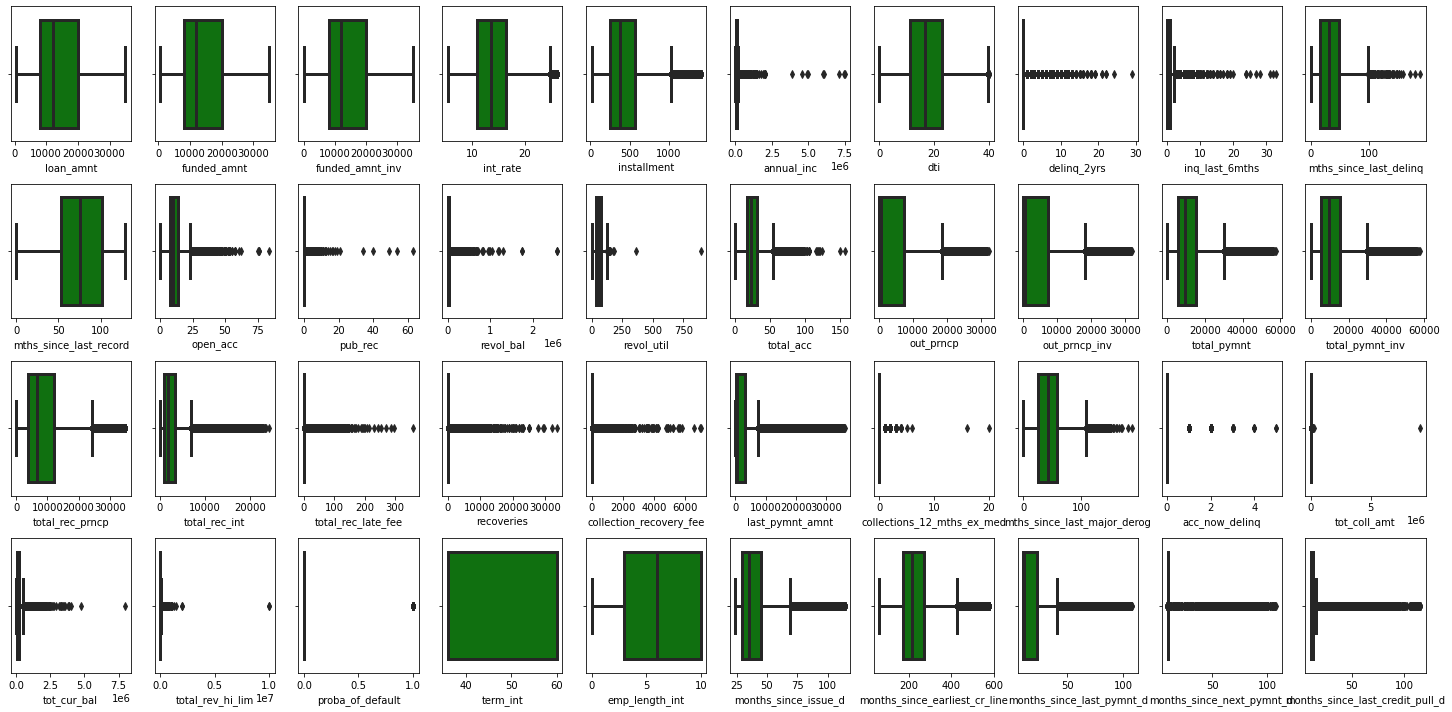

In [56]:
fig, axs = plt.subplots(nrows=4, ncols=10, figsize=(20,10))

for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], color='g', ax=axs[i//10, i%10])
    
plt.tight_layout()
plt.show()

- Terdapat beberapa kolom dengan global outliers yang sangat jauh dari distribusinya.
- Kolom-kolom tersebut adalah `tot_coll_amt`,`tot_cur_bal`,`total_rev_hi_lim`
- Ketiga kolom tersebut akan direduksi outliersnya dengan metode manual dikarenakan banyak fitur yang memang isinya outliers (variansnya sangat tinggi) 

In [57]:
from scipy import stats

In [58]:
print('Before drop rows:', df.shape)

df.drop(df[df['tot_coll_amt'] > 9000000].index, inplace=True)
df.drop(df[df['tot_cur_bal'] > 7000000].index, inplace=True)
df.drop(df[df['total_rev_hi_lim'] > 9000000].index, inplace=True)

print('After drop rows:', df.shape)

Before drop rows: (465116, 58)
After drop rows: (465112, 58)


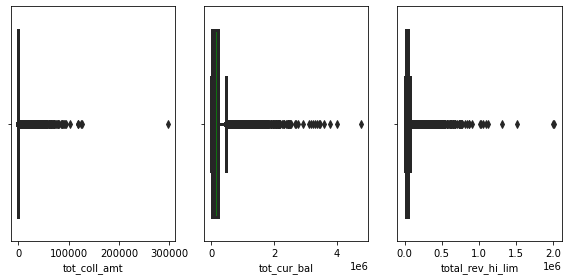

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8,4))
sns.boxplot(x='tot_coll_amt', data=df, color='g', ax=axs[0])
sns.boxplot(x='tot_cur_bal', data=df, color='g', ax=axs[1])
sns.boxplot(x='total_rev_hi_lim', data=df, color='g', ax=axs[2])
plt.tight_layout()
plt.show()

## Checking Invalid Values 

In [60]:
cats = df.select_dtypes(include=['object']).columns.tolist()
print(cats)

['term', 'grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'initial_list_status', 'application_type']


In [61]:
print(f"Unique values by features\n")

for cats_unique in cats:
    unique_values = df[cats_unique].unique()
    print(f"{cats_unique}:\n {unique_values}\n")

Unique values by features

term:
 [' 36 months' ' 60 months']

grade:
 ['B' 'C' 'A' 'E' 'F' 'D' 'G']

emp_title:
 [nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']

emp_length:
 ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

home_ownership:
 ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

verification_status:
 ['Verified' 'Source Verified' 'Not Verified']

loan_status:
 ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']

pymnt_plan:
 ['n' 'y']

purpose:
 ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']

title:
 ['Computer' 'bike' 'real estate busines

## Drop Features 2

In [62]:
# Constant Features

df.drop(['application_type'], axis=1, inplace=True)
df.shape

(465112, 57)

# Exploratory Data Analysis - Insights

In [63]:
df_eda = df.copy()
df_eda.sample(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,proba_of_default,term_int,emp_length_int,date_issue_d,months_since_issue_d,date_earliest_cr_line,months_since_earliest_cr_line,date_last_pymnt_d,months_since_last_pymnt_d,date_next_pymnt_d,months_since_next_pymnt_d,date_last_credit_pull_d,months_since_last_credit_pull_d
456569,23325,23325,23275.0,60 months,17.57,586.86,D,Cons. Foreman,10+ years,MORTGAGE,65000.0,Verified,Current,n,debt_consolidation,Debt consolidation,MD,22.84,0.0,0.0,NaN,NaN,12.0,0.0,25963,59.0,25.0,f,16673.09,16637.35,13497.34,13468.41,6651.91,6845.43,0.0,0.0,0.0,586.86,0.0,NaN,0.0,0.0,297212.0,44004.0,0,60,10.0,2014-01-01,35,1977-10-01,470.0,2015-12-01,12.0,2016-02-01,10.0,2016-01-01,11.0
35993,4000,4000,4000.0,36 months,15.37,139.39,D,Princeton Review,< 1 year,MORTGAGE,15000.0,Not Verified,Fully Paid,n,small_business,Foreign Language for Children Business,CA,15.04,0.0,1.0,NaN,NaN,4.0,0.0,1573,3.5,32.0,f,0.00,0.00,4272.49,4272.49,4000.00,272.49,0.0,0.0,0.0,2554.77,0.0,NaN,0.0,NaN,NaN,NaN,0,36,0.0,2009-07-01,89,1998-12-01,216.0,2010-02-01,82.0,NaT,NaN,2010-01-01,83.0
408173,3250,3250,3250.0,36 months,23.43,126.54,F,Pharmacist,10+ years,RENT,96000.0,Source Verified,Current,n,moving,Moving and relocation,VA,0.66,0.0,1.0,80.0,NaN,2.0,0.0,1758,50.2,4.0,f,1631.59,1631.59,2657.34,2657.34,1618.41,1038.93,0.0,0.0,0.0,126.54,0.0,NaN,0.0,0.0,1758.0,3500.0,0,36,10.0,2014-04-01,32,2005-08-01,136.0,2016-01-01,11.0,2016-02-01,10.0,2016-01-01,11.0


- Dikarenakan variabel terlalu banyak untuk dianalisis, sehingga untuk kali ini fitur `loan_amnt` akan menjadi fokus analisa.
- Hal ini bertujuan untuk melihat perubahan permohonan pinjaman dari tahun ke tahun dan pengaruhnya terhadap variabel lain.

## Timeseries Chart

In [64]:
df_datetime = df_eda.select_dtypes('datetime').columns.tolist()
print(df_datetime)

['date_issue_d', 'date_earliest_cr_line', 'date_last_pymnt_d', 'date_next_pymnt_d', 'date_last_credit_pull_d']


### Issue Date on Loan Amount

In [65]:
df_eda['year_issue_d'] = df_eda['date_issue_d'].dt.year
df_eda['month_issue_d'] = df_eda['date_issue_d'].dt.month

df_viz1 = df_eda.groupby(['year_issue_d', 'month_issue_d']).agg({'loan_amnt' : 'mean'}).reset_index()
df_viz1.columns = ['Year_Join', 'Month_Join', 'Average_Loan']
df_viz1

,Year_Join,Month_Join,Average_Loan
0,2007,6,3827.083333
1,2007,7,5528.968254
2,2007,8,6963.513514
3,2007,9,7036.792453
4,2007,10,7222.355769
5,2007,11,9005.803571
6,2007,12,11002.485380
7,2008,1,9593.442623
8,2008,2,9670.669935
9,2008,3,10332.000000


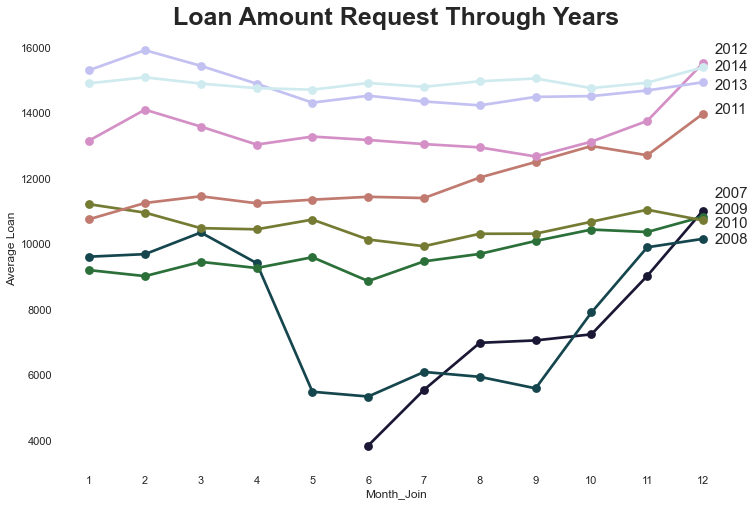

In [66]:
ax = sns.set(rc={'figure.figsize':(12,8)})
ax = sns.pointplot(x='Month_Join', y="Average_Loan", data=df_viz1, hue="Year_Join", palette="cubehelix")
ax.patch.set_facecolor('white')
ax.legend(title='Year_Join', loc='best')
ax.get_legend().remove() # hide this code if you wanna show the legend in the plot
plt.title("Loan Amount Request Through Years",fontsize=25, fontweight="bold")
plt.ylabel('Average Loan')
plt.text(11.2, 15805,"2012",fontsize= 15)
plt.text(11.2, 15275,"2014",fontsize= 15)
plt.text(11.2, 14719,"2013",fontsize= 15)
plt.text(11.2, 13985,"2011",fontsize= 15)
plt.text(11.2, 11419,"2007",fontsize= 15)
plt.text(11.2, 10917,"2009",fontsize= 15)
plt.text(11.2, 10500,"2010",fontsize= 15)
plt.text(11.2, 10000,"2008",fontsize= 15)
plt.show()

## Scatter Plot

### Loan Amount vs Funded Amount

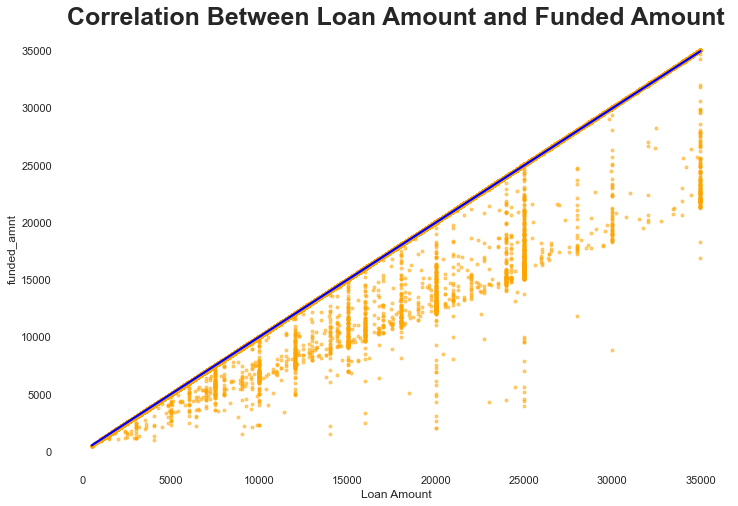

In [67]:
ax = sns.regplot(x='loan_amnt', y='funded_amnt', data=df_eda, marker=".", scatter_kws={'color':'orange','alpha':0.5}, line_kws={'color':"blue"})
ax.patch.set_facecolor('white')
plt.xlabel('Loan Amount')
plt.title('Correlation Between Loan Amount and Funded Amount', fontsize=25, fontweight="bold")
plt.show()

In [68]:
df_eda.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,proba_of_default,term_int,emp_length_int,date_issue_d,months_since_issue_d,date_earliest_cr_line,months_since_earliest_cr_line,date_last_pymnt_d,months_since_last_pymnt_d,date_next_pymnt_d,months_since_next_pymnt_d,date_last_credit_pull_d,months_since_last_credit_pull_d,year_issue_d,month_issue_d
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,0.0,NaN,NaN,NaN,0,36,10.0,2011-12-01,60,1985-01-01,383.0,2015-01-01,23.0,NaT,NaN,2016-01-01,11.0,2011,12
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,0.0,NaN,NaN,NaN,1,60,0.0,2011-12-01,60,1999-04-01,212.0,2013-04-01,44.0,NaT,NaN,2013-09-01,39.0,2011,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,0.0,NaN,NaN,NaN,0,36,10.0,2011-12-01,60,2001-11-01,181.0,2014-06-01,30.0,NaT,NaN,2016-01-01,11.0,2011,12
3,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,0.0,NaN,NaN,NaN,0,36,10.0,2011-12-01,60,1996-02-01,250.0,2015-01-01,23.0,NaT,NaN,2015-01-01,23.0,2011,12
4,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Current,n,other,Personal,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,0.0,NaN,NaN,NaN,0,60,1.0,2011-12-01,60,1996-01-01,251.0,2016-01-01,11.0,2016-02-01,10.0,2016-01-01,11.0,2011,12


## Persona Plot

### Count Ratio Bad Loan & Good Loan

In [69]:
df_pp1 = df_eda.groupby(['proba_of_default']).agg({'loan_amnt':'count'}).reset_index()
df_pp1.columns = ['proba_of_default','total_user']
df_pp1['Ratio'] = round(df_pp1['total_user']/df_pp1['total_user'].sum()*100,0)
df_pp1

,proba_of_default,total_user,Ratio
0,0,409935,88.0
1,1,55177,12.0


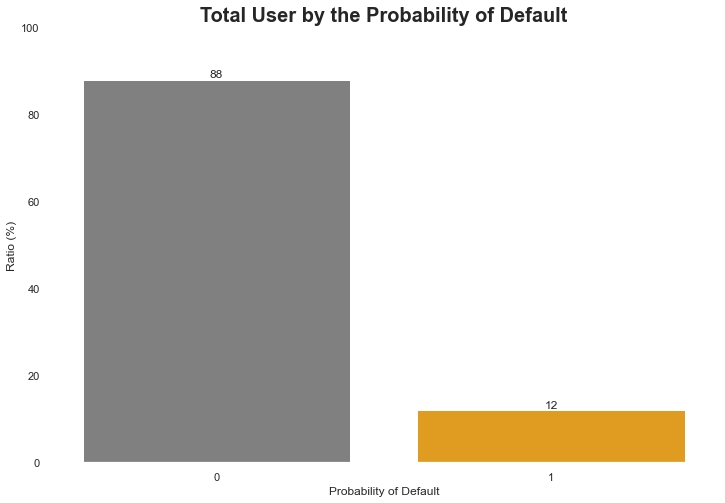

In [70]:
cols = ['orange' if x == 12 else 'grey' for x in df_pp1['Ratio']]
ax = sns.set_theme(style='darkgrid')
ax = sns.barplot(data=df_pp1,
            x='proba_of_default',
            y='Ratio',
            palette = cols)

plt.title('Total User by the Probability of Default', size=20, weight='bold')
ax.bar_label(ax.containers[0])
ax.patch.set_facecolor('white')
plt.xlabel('Probability of Default')
plt.ylabel('Ratio (%)')
plt.ylim(0,100)
plt.show()

### Count Ratio of Purpose

In [71]:
df_pp2 = df_eda.groupby(['purpose']).agg({'loan_amnt':'count'}).reset_index()
df_pp2.columns = ['purpose','total_user']
df_pp2['Ratio'] = round(df_pp2['total_user']/df_pp2['total_user'].sum()*100,1)
df_pp2 = df_pp2.sort_values(by =['Ratio'], ascending=False).reset_index()
df_pp2 = df_pp2.drop(columns=['index'])
df_pp2

,purpose,total_user,Ratio
0,debt_consolidation,273587,58.8
1,credit_card,103824,22.3
2,home_improvement,26460,5.7
3,other,23625,5.1
4,major_purchase,9807,2.1
5,small_business,6994,1.5
6,car,5380,1.2
7,medical,4586,1.0
8,moving,2987,0.6
9,house,2269,0.5


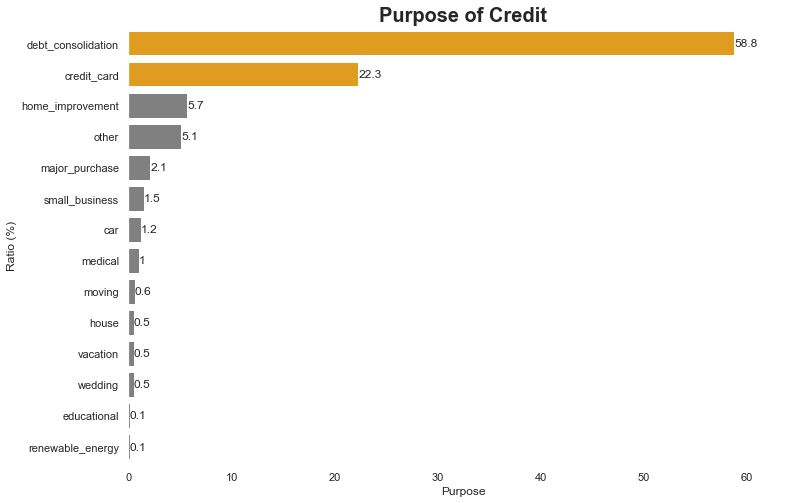

In [72]:
cols = ['orange' if x >= 12 else 'grey' for x in df_pp2['Ratio']]
ax = sns.set_theme(style='darkgrid')
ax = sns.barplot(data=df_pp2,
            x='Ratio',
            y='purpose',
            palette = cols)

plt.title('Purpose of Credit', size=20, weight='bold')
ax.bar_label(ax.containers[0])
ax.patch.set_facecolor('white')
plt.xlabel('Purpose')
plt.ylabel('Ratio (%)')
plt.xlim(0,65)
plt.show()

Personal loan purposes vs. Business loan purposes:
- Personal loan purposes: debt_consolidation, credit_card, home_improvement, major_purchase, car, medical, moving, house, vacation, wedding, other
- Business loan purposes: small_business, educational, renewable_energy

In [73]:
df_eda['purpose_sum'] = np.where(df_eda['purpose']=='small_business', 'business loan',
                           np.where(df_eda['purpose']=='educational', 'business loan',
                                np.where(df_eda['purpose']=='renewable_energy', 'business loan','personal loan')))
df_eda.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,proba_of_default,term_int,emp_length_int,date_issue_d,months_since_issue_d,date_earliest_cr_line,months_since_earliest_cr_line,date_last_pymnt_d,months_since_last_pymnt_d,date_next_pymnt_d,months_since_next_pymnt_d,date_last_credit_pull_d,months_since_last_credit_pull_d,year_issue_d,month_issue_d,purpose_sum
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,171.62,0.0,NaN,0.0,NaN,NaN,NaN,0,36,10.0,2011-12-01,60,1985-01-01,383.0,2015-01-01,23.0,NaT,NaN,2016-01-01,11.0,2011,12,personal loan
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,0.0,NaN,0.0,NaN,NaN,NaN,1,60,0.0,2011-12-01,60,1999-04-01,212.0,2013-04-01,44.0,NaT,NaN,2013-09-01,39.0,2011,12,personal loan
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,649.91,0.0,NaN,0.0,NaN,NaN,NaN,0,36,10.0,2011-12-01,60,2001-11-01,181.0,2014-06-01,30.0,NaT,NaN,2016-01-01,11.0,2011,12,business loan


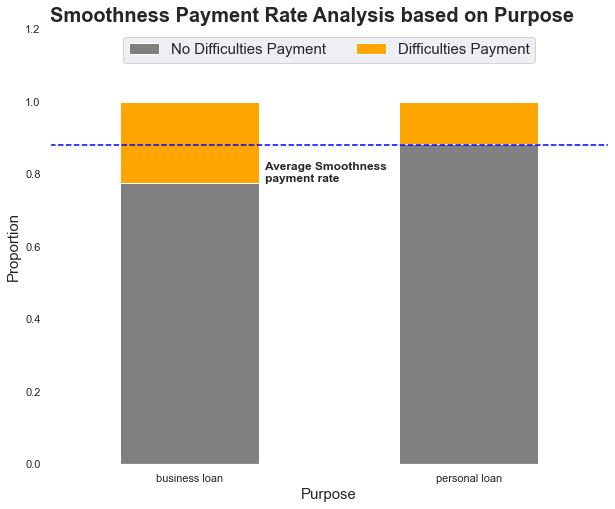

In [74]:
df_pp3 = df_eda[['purpose_sum','proba_of_default']]
df_pp3['proba_of_default'] = np.where(df_pp3['proba_of_default']==1,'Difficulties Payment','No Difficulties Payment')

cross_tab_prop = pd.crosstab(index=df_pp3['purpose_sum'],
                             columns=df_pp3['proba_of_default'],
                             normalize="index")
cross_tab_prop = cross_tab_prop[['No Difficulties Payment','Difficulties Payment']]


ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=['Grey','Orange'],
                    figsize=(10, 8))

plt.legend(loc="upper center",ncol=5, fontsize = 15)
ax.patch.set_facecolor('white')
plt.axhline(y = df_eda['proba_of_default'].value_counts(True)[0], color ="Blue", linestyle ="--")
plt.text(x=-0.5,y=1.22,s="Smoothness Payment Rate Analysis based on Purpose",fontsize=20,weight='bold')
plt.text(x=0.27,y=cross_tab_prop['No Difficulties Payment'].mean()-0.05,s='Average Smoothness \npayment rate',fontsize=12,weight='bold')
plt.xlabel("Purpose",fontsize = 15)
plt.ylabel("Proportion",fontsize = 15)
plt.ylim(0,1.2)
plt.xticks(rotation = 0)
plt.show()

### Count Ratio of Initial List Status

In [75]:
df_pp4 = df_eda.groupby(['initial_list_status']).agg({'loan_amnt':'count'}).reset_index()
df_pp4.columns = ['initial_list_status','total_user']
df_pp4['initial_list_status'] = np.where(df_pp4['initial_list_status']=='f','Fully Funded','Not Fully Funded')
df_pp4['Ratio'] = round(df_pp4['total_user']/df_pp4['total_user'].sum()*100,1)
df_pp4 = df_pp4.sort_values(by =['Ratio'], ascending=False).reset_index()
df_pp4 = df_pp4.drop(columns=['index'])
df_pp4

,initial_list_status,total_user,Ratio
0,Fully Funded,302268,65.0
1,Not Fully Funded,162844,35.0


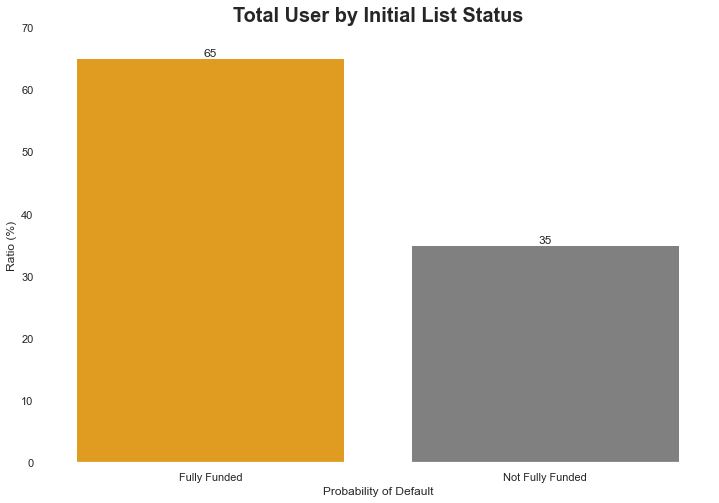

In [76]:
cols = ['orange' if x == 65 else 'grey' for x in df_pp4['Ratio']]
ax = sns.set_theme(style='darkgrid')
ax = sns.barplot(data=df_pp4,
            x='initial_list_status',
            y='Ratio',
            palette = cols)

plt.title('Total User by Initial List Status', size=20, weight='bold')
ax.bar_label(ax.containers[0])
ax.patch.set_facecolor('white')
plt.xlabel('Probability of Default')
plt.ylabel('Ratio (%)')
plt.ylim(0,70)
plt.show()

# Exploratory Data Analysis - Redundant Features

## Drop Features 3

In [77]:
# Drop after EDA - Insights

cols_to_drop2 = ['loan_status', 
                 'term', 
                 'emp_length', 
                 'date_issue_d', 
                 'date_earliest_cr_line', 
                 'date_last_pymnt_d', 
                 'date_next_pymnt_d', 
                 'date_last_credit_pull_d']
df.drop(cols_to_drop2, axis=1, inplace=True)

### Numerical Features (Drop High Correlation)

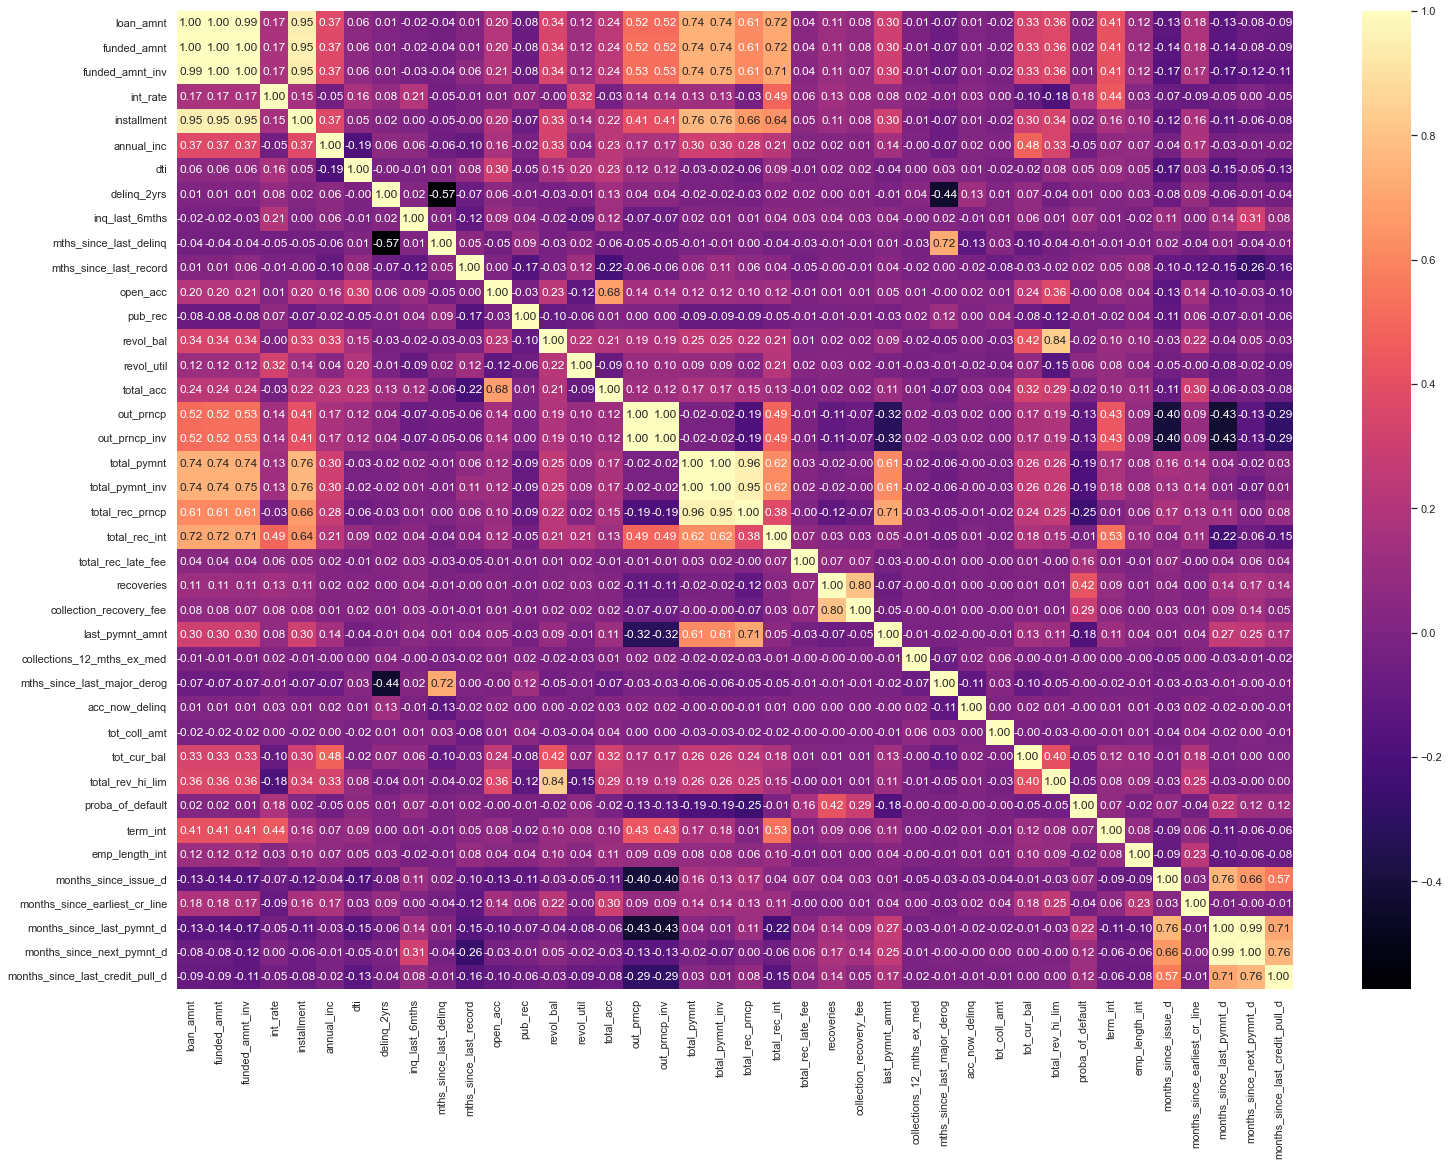

(465112, 49)

In [78]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt='.2f')
plt.show()
display(df.shape)

- Hasil heatmap korelasi menunjukkan terdapat banyak fitur yang redundan.
- Oleh sebab itu, fitur yang memiliki korelasi > 0.7 akan dihapus salah satunya agar menghindari multikolinieritas.
- Nilai batas korelasi 0.7 memberikan trade-off yang baik antara menghilangkan fitur yang redundan dan mempertahankan fitur yang berbeda-beda namun masih berkaitan satu sama lain. Nilai korelasi di bawah 0.7 umumnya dianggap sebagai korelasi yang lemah atau tidak signifikan, sementara nilai di atas 0.7 dianggap sebagai korelasi yang kuat dan mengandung informasi yang redundan. Oleh karena itu, nilai batas korelasi 0.7 sering dianggap sebagai batas yang tepat untuk mempertimbangkan kedua hal ini.

In [79]:
# Compute the absolute correlation matrix
corr_matrix = np.abs(df.corr())

# Select upper triangle of the correlation matrix
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
upper_triangle = corr_matrix.where(mask)

# Find columns with correlation greater than 0.7
to_drop_hicorr = [col for col in upper_triangle.columns if any (upper_triangle[col].gt(0.7))]
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'months_since_last_pymnt_d',
 'months_since_next_pymnt_d',
 'months_since_last_credit_pull_d']

In [80]:
df.drop(to_drop_hicorr, axis=1, inplace=True)
df.shape

(465112, 34)

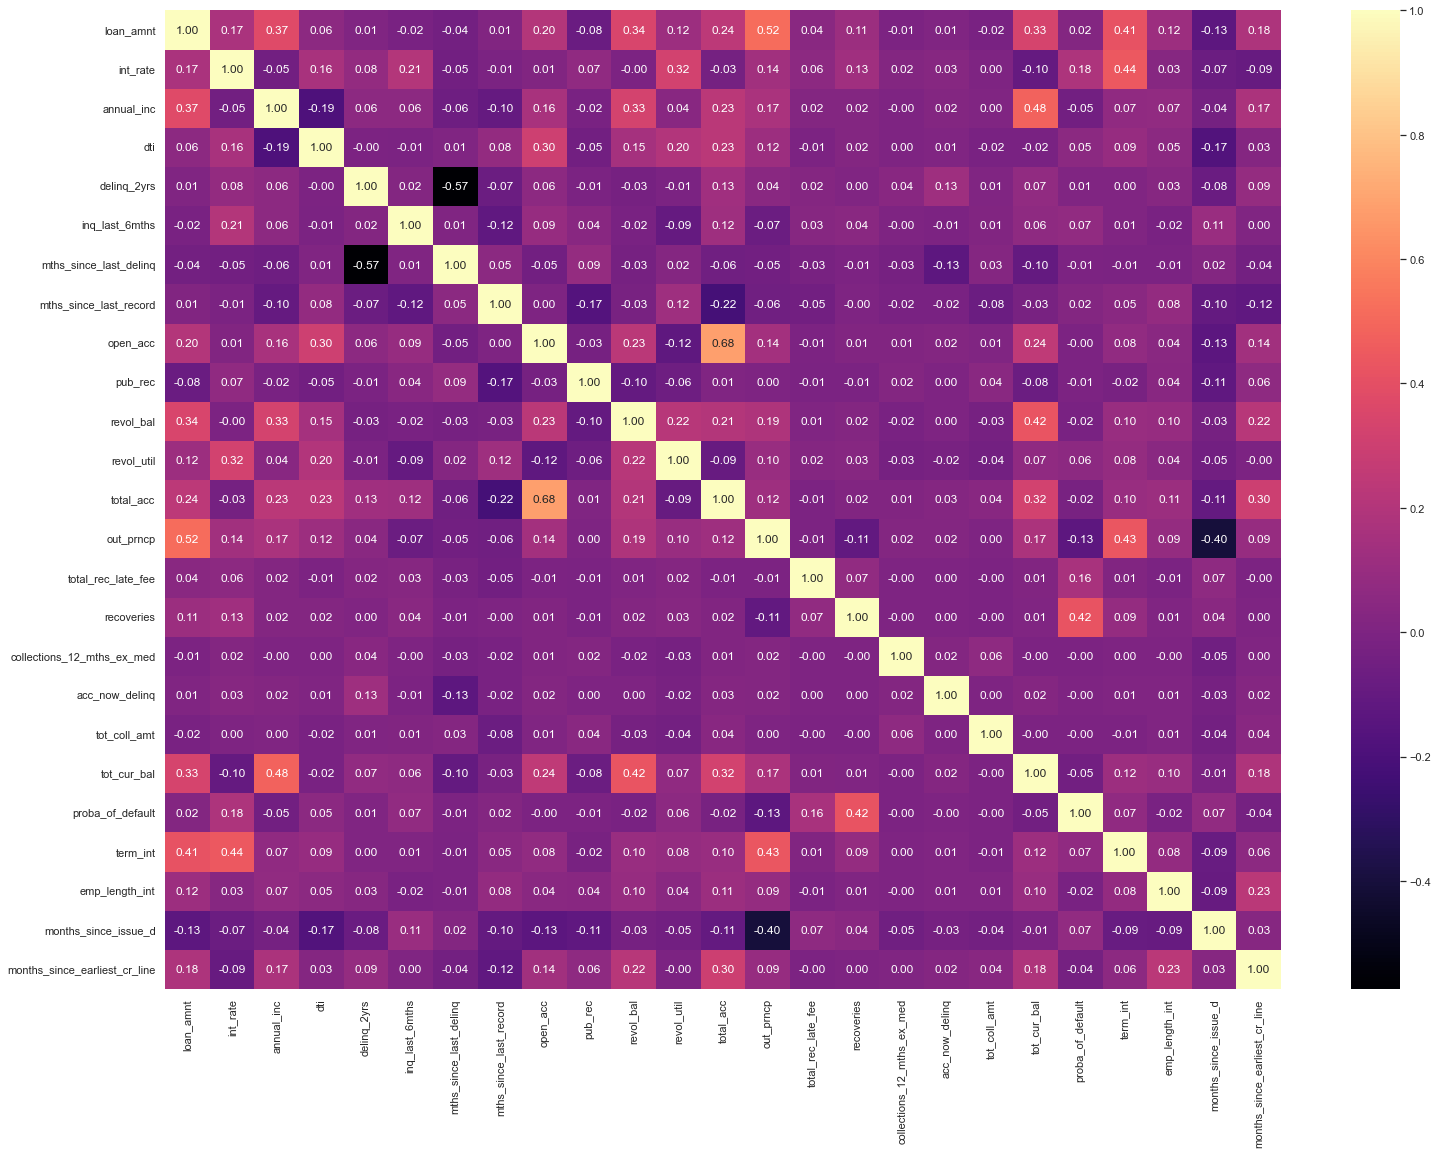

In [81]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt='.2f')
plt.show()

### Categorical Features (Drop High Cradinality)

In [82]:
df.select_dtypes(include='object').nunique().sort_values(ascending=False)

emp_title              205222
title                   62980
addr_state                 50
purpose                    14
grade                       7
home_ownership              6
verification_status         3
pymnt_plan                  2
initial_list_status         2
dtype: int64

- High cardinality (kardinalitas tinggi) adalah istilah yang digunakan dalam analisis data untuk menggambarkan sebuah kolom atau fitur yang memiliki banyak nilai unik atau kategori yang berbeda.
- Dari fitur-fitur di atas, fitur yang akan di drop adalah `emp_title` dan `title`.
- Hal ini bertujuan untuk meningkatkan kinerja algoritma dan harapannya dapan menurunkan resiko overfitting.

In [83]:
df.drop(['emp_title', 'title'], axis=1, inplace=True)
df.shape

(465112, 32)

### Categorical Featurs (Drop Imbalance Class)

In [84]:
new_cats = df.select_dtypes(include=['object']).columns.tolist()
print(new_cats)

['grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status']


In [85]:
print(f"Check Imbalance class by categorical features\n")

for imb_cats in new_cats:
    count_values = df[imb_cats].value_counts(normalize=True)*100
    print(f"{imb_cats}:\n{count_values}\n")

Check Imbalance class by categorical features

grade:
B    29.358520
C    26.872022
D    16.497102
A    16.045383
E     7.672776
F     2.840821
G     0.713377
Name: grade, dtype: float64

home_ownership:
MORTGAGE    50.569970
RENT        40.453697
OWN          8.926452
OTHER        0.038915
NONE         0.010750
ANY          0.000215
Name: home_ownership, dtype: float64

verification_status:
Verified           35.998856
Source Verified    32.174616
Not Verified       31.826528
Name: verification_status, dtype: float64

pymnt_plan:
n    99.998065
y     0.001935
Name: pymnt_plan, dtype: float64

purpose:
debt_consolidation    58.821746
credit_card           22.322365
home_improvement       5.688952
other                  5.079422
major_purchase         2.108524
small_business         1.503724
car                    1.156711
medical                0.985999
moving                 0.642211
vacation               0.532775
wedding                0.503750
house                  0.487839
educat

In [86]:
df.drop('pymnt_plan', axis=1, inplace=True)

# Handling Missing Values

## Dropping Columns with more than 75% Missing Values
- Menghapus kolom yang memiliki lebih dari 75% nilai yang hilang adalah praktik umum dalam pre-processing data karena kolom-kolom ini umumnya tidak memberikan cukup informasi yang berguna untuk analisis atau pemodelan. Ketika suatu kolom memiliki persentase nilai yang hilang yang tinggi, itu dapat memperkenalkan bias atau noise ke dalam proses analisis atau pemodelan.

In [87]:
df.isna().sum().sort_values(ascending=False) * 100 / df.shape[0]

mths_since_last_record           86.594842
mths_since_last_delinq           53.713299
tot_cur_bal                      15.081099
tot_coll_amt                     15.081099
emp_length_int                    4.424311
revol_util                        0.073101
collections_12_mths_ex_med        0.031175
months_since_earliest_cr_line     0.006235
total_acc                         0.006235
acc_now_delinq                    0.006235
pub_rec                           0.006235
open_acc                          0.006235
inq_last_6mths                    0.006235
delinq_2yrs                       0.006235
annual_inc                        0.000860
total_rec_late_fee                0.000000
proba_of_default                  0.000000
term_int                          0.000000
months_since_issue_d              0.000000
recoveries                        0.000000
loan_amnt                         0.000000
out_prncp                         0.000000
initial_list_status               0.000000
int_rate   

In [88]:
df.drop('mths_since_last_record', axis=1, inplace=True)

## Filling Missing Values (Step by Step)
- Mengisi missing values dengan nilai tertentu, seperti 0 dan -1, adalah teknik yang umum digunakan dalam pre-processing data.
- 0 dan -1 adalah nilai yang tidak mungkin terjadi dalam data, sehingga mudah diidentifikasi dan dipisahkan dari nilai data aktual. Ini dapat membantu untuk analisis dan pemodelan yang lebih baik di tahap selanjutnya.
- Mengisi nilai yang hilang dengan 0 atau -1 juga dapat membantu untuk mempertahankan distribusi data. Misalnya, jika suatu fitur numerik memiliki distribusi normal, mengisi nilai yang hilang dengan mean dapat memiringkan distribusi, sedangkan mengisi dengan 0 atau -1 tidak akan memengaruhi distribusi.
- Namun yang perlu digarisbawahi adalah sebelum menentukannya, setiap fitur harus dilihat nilai minimumnya terlebih dahulu. Sebagai contoh, apabila nilai minimum dari sebuah kolom adalah 0 maka kita jangan mengisi nilai missing value dengan 0, tetapi dengan -1.

In [89]:
df['mths_since_last_delinq'].describe()

count    215285.000000
mean         34.107532
std          21.776277
min           0.000000
25%          16.000000
50%          31.000000
75%          49.000000
max         188.000000
Name: mths_since_last_delinq, dtype: float64

In [90]:
df['mths_since_last_delinq'].fillna(-1, inplace=True)

In [91]:
df['tot_cur_bal'].describe()

count    3.949680e+05
mean     1.387374e+05
std      1.512793e+05
min      0.000000e+00
25%      2.863500e+04
50%      8.155300e+04
75%      2.089240e+05
max      4.772549e+06
Name: tot_cur_bal, dtype: float64

In [92]:
df['tot_cur_bal'].fillna(-1, inplace=True)

In [93]:
df['tot_coll_amt'].describe()

count    394968.000000
mean        168.288882
std        1583.410877
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      296368.000000
Name: tot_coll_amt, dtype: float64

In [94]:
df['tot_coll_amt'].fillna(-1, inplace=True)

In [95]:
df['emp_length_int'].describe()

count    444534.000000
mean          5.992073
std           3.626966
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length_int, dtype: float64

In [96]:
df['emp_length_int'].fillna(-1, inplace=True)

In [97]:
df['revol_util'].describe()

count    464772.000000
mean         56.188080
std          23.730662
min           0.000000
25%          39.200000
50%          57.600000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64

In [98]:
df['revol_util'].fillna(-1, inplace=True)

In [99]:
df['collections_12_mths_ex_med'].describe()

count    464967.000000
mean          0.009093
std           0.108716
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64

In [100]:
df['collections_12_mths_ex_med'].fillna(-1, inplace=True)

In [101]:
df['months_since_earliest_cr_line'].describe()

count    465083.000000
mean        229.518617
std          84.822698
min          61.000000
25%         171.000000
50%         213.000000
75%         273.000000
max         575.000000
Name: months_since_earliest_cr_line, dtype: float64

In [102]:
df['months_since_earliest_cr_line'].fillna(0, inplace=True)

In [103]:
df['total_acc'].describe()

count    465083.000000
mean         25.056635
std          11.599590
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64

In [104]:
df['total_acc'].fillna(0, inplace=True)

In [105]:
df['acc_now_delinq'].describe()

count    465083.000000
mean          0.003993
std           0.068583
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: acc_now_delinq, dtype: float64

In [106]:
df['acc_now_delinq'].fillna(-1, inplace=True)

In [107]:
df['pub_rec'].describe()

count    465083.000000
mean          0.160113
std           0.509222
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64

In [108]:
df['pub_rec'].fillna(-1, inplace=True)

In [109]:
df['open_acc'].describe()

count    465083.000000
mean         11.185963
std           4.987710
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64

In [110]:
df['open_acc'].fillna(-1, inplace=True)

In [111]:
df['inq_last_6mths'].describe()

count    465083.000000
mean          0.804736
std           1.091566
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64

In [112]:
df['inq_last_6mths'].fillna(-1, inplace=True)

In [113]:
df['delinq_2yrs'].describe()

count    465083.000000
mean          0.284375
std           0.796834
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

In [114]:
df['delinq_2yrs'].fillna(-1, inplace=True)

- Apabila missing values pada fitur `annual_inc` dengan 0 atau -1 dapat mempengaruhi analisis statistik atau machine learning yang dilakukan karena dapat memberikan informasi yang salah tentang data yang sebenarnya. Sebagai contoh, mengisi missing values dengan 0 pada kolom yang berisi nilai gaji dapat memberikan kesan bahwa pekerja yang bersangkutan tidak mendapatkan gaji sama sekali, padahal hal tersebut mungkin tidak benar. Oleh karena itu, mengisi missing values dengan median biasanya merupakan pilihan yang lebih tepat daripada menggunakan nilai konstan yang sifatnya arbitrary seperti 0 atau -1.

In [115]:
df['annual_inc'].describe()

count    4.651080e+05
mean     7.324893e+04
std      5.442542e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.882025e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

In [116]:
df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)

In [117]:
display(df.head())
print(df.shape)

,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,proba_of_default,term_int,emp_length_int,months_since_issue_d,months_since_earliest_cr_line
0,5000,10.65,B,RENT,24000.0,Verified,credit_card,AZ,27.65,0.0,1.0,-1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.00,0.00,0.0,0.0,-1.0,-1.0,0,36,10.0,60,383.0
1,2500,15.27,C,RENT,30000.0,Source Verified,car,GA,1.00,0.0,5.0,-1.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.00,117.08,0.0,0.0,-1.0,-1.0,1,60,0.0,60,212.0
2,2400,15.96,C,RENT,12252.0,Not Verified,small_business,IL,8.72,0.0,2.0,-1.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.00,0.00,0.0,0.0,-1.0,-1.0,0,36,10.0,60,181.0
3,10000,13.49,C,RENT,49200.0,Source Verified,other,CA,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,16.97,0.00,0.0,0.0,-1.0,-1.0,0,36,10.0,60,250.0
4,3000,12.69,B,RENT,80000.0,Source Verified,other,OR,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,0.00,0.00,0.0,0.0,-1.0,-1.0,0,60,1.0,60,251.0


(465112, 30)


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465112 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      465112 non-null  int64  
 1   int_rate                       465112 non-null  float64
 2   grade                          465112 non-null  object 
 3   home_ownership                 465112 non-null  object 
 4   annual_inc                     465112 non-null  float64
 5   verification_status            465112 non-null  object 
 6   purpose                        465112 non-null  object 
 7   addr_state                     465112 non-null  object 
 8   dti                            465112 non-null  float64
 9   delinq_2yrs                    465112 non-null  float64
 10  inq_last_6mths                 465112 non-null  float64
 11  mths_since_last_delinq         465112 non-null  float64
 12  open_acc                      

# Split Dataset

In [119]:
from sklearn.model_selection import train_test_split

X = df.drop('proba_of_default', axis=1)
y = df['proba_of_default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
X_train.shape

(372089, 29)

In [121]:
y_train.shape

(372089,)

In [122]:
X_test.shape

(93023, 29)

In [123]:
y_test.shape

(93023,)

# Feature Encoding & Standardization

In [124]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int32', 'int64', 'float64']).columns

## OneHot Encoding and Standard Scaler

In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


# define a pipeline for one-hot encoding the categorical features
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')
ohe_pipe = Pipeline([('onehot_encoder', onehot_encoder)])

# define a pipeline for standardization for the numerical features
scaler = StandardScaler()
std_pipe = Pipeline([('scaler', scaler)])

# define a preprocessor that applies the one-hot encoding pipeline to the categorical features
preprocessor = ColumnTransformer([
    ('std_pipe', std_pipe, numerical_features),
    ('ohe_pipe', ohe_pipe, categorical_features)])

In [126]:
# fit and transform the train data
X_train_processed = preprocessor.fit_transform(X_train)

# transform the test data
X_test_processed = preprocessor.transform(X_test)

In [127]:
# get the feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['ohe_pipe'].named_steps['onehot_encoder'].get_feature_names_out(categorical_features)

# combine the feature names of numerical and one-hot encoded categorical features
feature_names = list(numerical_features) + list(ohe_feature_names)

# create a new DataFrame with preprocessed data and feature names
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names)

In [128]:
X_train_processed.head(3)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,term_int,emp_length_int,months_since_issue_d,months_since_earliest_cr_line,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,-0.763022,-0.844544,0.030673,-1.352328,2.155962,-0.738665,-0.490164,-0.236660,-0.311325,-0.402461,-0.911985,-0.607039,0.017704,-0.123065,-0.154091,-0.078688,-0.056721,-0.006565,-0.728388,-0.616478,-0.963017,-0.784607,0.382181,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.149332,-0.392455,-0.668280,0.277769,-0.357223,-0.738665,0.557005,0.565358,-0.311325,-0.461277,-0.264017,-0.348519,-0.693584,-0.123065,-0.154091,-0.078688,-0.056721,-0.096837,-0.403549,-0.616478,0.082166,0.609006,-0.288949,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.763022,0.855953,-0.435295,-1.366337,-0.357223,1.098181,-0.708324,0.565358,1.625939,-0.442085,-1.278045,-0.348519,-0.435734,-0.123065,-0.154091,-0.078688,-0.056721,-0.096837,-0.745472,-0.616478,-1.746905,0.121241,0.252664,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [129]:
X_test_processed.head(3)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,term_int,emp_length_int,months_since_issue_d,months_since_earliest_cr_line,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,0.323472,-1.365479,0.401297,-0.830188,-0.357223,-0.738665,-0.708324,0.364854,-0.311325,0.412930,-0.184073,0.857908,-0.693584,-0.123065,-0.154091,-0.078688,-0.056721,-0.097521,-0.794887,-0.616478,1.127350,2.560065,1.135729,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.702662,-1.409082,-0.650358,-0.173055,-0.357223,-0.738665,-0.708324,0.364854,1.625939,-0.364325,-1.025590,0.082348,0.050084,-0.123065,-0.154091,-0.078688,-0.056721,-0.096837,0.000065,-0.616478,0.866054,-0.784607,0.358632,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.004466,0.114711,-0.527826,1.585668,-0.357223,0.179758,1.429646,0.565358,-0.311325,-0.276398,0.156742,-0.693212,-0.693584,-0.123065,-0.154091,-0.078688,-0.056721,-0.096837,-0.362763,-0.616478,-0.179130,0.399964,-1.360400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [130]:
print(X_train_processed.shape)
print(X_test_processed.shape)

(372089, 99)
(93023, 99)


# Undersampling
- `RandomUnderSampler` dilakukan karena pc saya tidak kuat untuk mengoperasikan jenis under sampler lain (Tomek Link atau ENN) maupun oversampling untuk data yang jumlahnya amat banyak seperti dataset credit risk ini.

In [131]:
# before undersampling
print(pd.Series(y_train).value_counts())

0    327784
1     44305
Name: proba_of_default, dtype: int64


In [132]:
# after undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_undersampling, y_undersampling = rus.fit_resample(X_train_processed, y_train)

print(pd.Series(y_undersampling).value_counts())

0    44305
1    44305
Name: proba_of_default, dtype: int64


# Modelling

## Function

In [133]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score, confusion_matrix

def evaluate_model(model):
    y_pred = model.predict(X_test_processed)
    y_pred_train = model.predict(X_undersampling)
    y_pred_proba = model.predict_proba(X_test_processed)
    y_pred_proba_train = model.predict_proba(X_undersampling)
    
    print('**EVALUATION WITH UNDERSAMPLING**\nAUC Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_undersampling,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')
    
    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')
    
    print('**CONFUSION MATRIX**') 
    print(confusion_matrix(y_test, y_pred))

## Run the Model

### Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_undersampling, y_undersampling)

LogisticRegression()

In [135]:
evaluate_model(model_lr)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.835768
AUC Score Test proba: 0.82934

Others Metrics Evaluation:
Test Accuracy Score : 0.8559
Precision Score Test: 0.4216
Recall Score Test : 0.6253
F1 Score Test : 0.5036

**CONFUSION MATRIX**
[[72823  9328]
 [ 4074  6798]]


### Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(random_state=42)
model_dtree.fit(X_undersampling, y_undersampling)

DecisionTreeClassifier(random_state=42)

In [137]:
evaluate_model(model_dtree)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.720554

Others Metrics Evaluation:
Test Accuracy Score : 0.7185
Precision Score Test: 0.2533
Recall Score Test : 0.7232
F1 Score Test : 0.3752

**CONFUSION MATRIX**
[[58974 23177]
 [ 3009  7863]]


### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
model_rforest = RandomForestClassifier(random_state=42)
model_rforest.fit(X_undersampling, y_undersampling)

RandomForestClassifier(random_state=42)

In [139]:
evaluate_model(model_rforest)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.849552

Others Metrics Evaluation:
Test Accuracy Score : 0.8532
Precision Score Test: 0.4193
Recall Score Test : 0.6661
F1 Score Test : 0.5146

**CONFUSION MATRIX**
[[72121 10030]
 [ 3630  7242]]


### Adaboost

In [140]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier(random_state=42)
model_adaboost.fit(X_undersampling, y_undersampling)

AdaBoostClassifier(random_state=42)

In [141]:
evaluate_model(model_adaboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.852024
AUC Score Test proba: 0.844366

Others Metrics Evaluation:
Test Accuracy Score : 0.8551
Precision Score Test: 0.4232
Recall Score Test : 0.6606
F1 Score Test : 0.5159

**CONFUSION MATRIX**
[[72362  9789]
 [ 3690  7182]]


### XGBoost

In [142]:
from xgboost import XGBClassifier

model_xgboost = XGBClassifier(random_state=42)
model_xgboost.fit(X_undersampling, y_undersampling)

[19:01:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
evaluate_model(model_xgboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.932327
AUC Score Test proba: 0.883751

Others Metrics Evaluation:
Test Accuracy Score : 0.8568
Precision Score Test: 0.4325
Recall Score Test : 0.721
F1 Score Test : 0.5407

**CONFUSION MATRIX**
[[71865 10286]
 [ 3033  7839]]


### LGBM (Light Gradient Boosting Machine)

In [144]:
from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier(random_state=42)
model_lgbm.fit(X_undersampling, y_undersampling)

LGBMClassifier(random_state=42)

In [145]:
evaluate_model(model_lgbm)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.89079
AUC Score Test proba: 0.867592

Others Metrics Evaluation:
Test Accuracy Score : 0.8601
Precision Score Test: 0.4369
Recall Score Test : 0.6821
F1 Score Test : 0.5327

**CONFUSION MATRIX**
[[72594  9557]
 [ 3456  7416]]


Dari hasil run model pada tahap awal ini dapat disimpulkan bahwa :
- Model menghasilkan nilai precision yang kurang baik untuk setiap algoritma yang digunakan.
- Kemungkinan hal ini disebabkan oleh kualitas data yang kurang baik dan penggunaan undersampling dalam preprocessing. Oleh karena itu, apabila memungkinkan, sebaiknya dilakukan penggunaan oversampling untuk meningkatkan performa model.
- Score AUC Train vs Test Adaboost XGBoost, dan LGM yang lebih baik dibandingkan dengan algoritma lainnya. Oleh karena itu, untuk ke depannya dalam melakukan hyperparameter tuning, fokus akan diberikan pada ketiga model tersebut.

## Cross Validation

In [146]:
from sklearn.model_selection import cross_validate, KFold

# score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
#     print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
#     print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

#Evaluation using cross validation method
cross_roc_auc_score_lst_train = []
cross_roc_auc_score_lst_test = []
def cross_val_evaluation(model):
    kf = KFold(n_splits=3)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_processed = preprocessor.fit_transform(X_train)
        X_test_processed = preprocessor.transform(X_test)
        
        rus = RandomUnderSampler(random_state=42)
        X_undersampling, y_undersampling = rus.fit_resample(X_train_processed, y_train)
        
        model.fit(X_undersampling, y_undersampling)
        
        y_pred_proba = model.predict_proba(X_test_processed)
        y_pred_proba_train = model.predict_proba(X_undersampling)
        cross_val_roc_auc_score_train = round(roc_auc_score(y_undersampling,y_pred_proba_train[:,1]),3)
        cross_val_roc_auc_score_test = round(roc_auc_score(y_test,y_pred_proba[:,1]),3)
        cross_roc_auc_score_lst_train.append(cross_val_roc_auc_score_train)
        cross_roc_auc_score_lst_test.append(cross_val_roc_auc_score_test)

In [147]:
def result_crosval(models, X, y):
    results = []
    for model in models:
        cross_val_evaluation(model)
        results.append({'Model': type(model).__name__, 'AUC Train': round(np.mean(cross_roc_auc_score_lst_train), 3), 'AUC Test': round(np.mean(cross_roc_auc_score_lst_test), 3)})
    return pd.DataFrame(results)

In [148]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    LGBMClassifier()]

In [149]:
%%time
result_crosval(models,X_undersampling, y_undersampling)

[19:08:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:08:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:09:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: total: 9min 35s
Wall time: 6min 56s


,Model,AUC Train,AUC Test
0,LogisticRegression,0.834,0.824
1,DecisionTreeClassifier,0.917,0.757
2,RandomForestClassifier,0.945,0.787
3,AdaBoostClassifier,0.921,0.800
4,XGBClassifier,0.924,0.809
5,LGBMClassifier,0.920,0.816


# Hyperparameter Tuning
- Proses tuning hyperparameter dilakukan untuk semua algoritma yang digunakan.
- Namun, dikarenakan adanya keterbatasan memori pada PC yang digunakan, maka range parameter dan jumlah cross-validation (cv) harus dibatasi agar dapat dijalankan secara efisien.
- Meskipun demikian, upaya untuk menemukan kombinasi parameter terbaik untuk meningkatkan performa model tetap dilakukan untuk setiap algoritma.

## Function

In [150]:
def evaluation_tuned(model):
    y_pred = model.predict(X_test_processed)
    y_pred_train = model.predict(X_undersampling)
    y_pred_proba = model.predict_proba(X_test_processed)
    y_pred_proba_train = model.predict_proba(X_undersampling)
    
    print('**EVALUATION WITH UNDERSAMPLING**\nAUC Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_undersampling,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')
    
    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')
    
    print('**CONFUSION MATRIX**') 
    print(confusion_matrix(y_test, y_pred))

In [151]:
from sklearn.model_selection import RandomizedSearchCV

### Logistic Regression

In [152]:
logreg = LogisticRegression()
logreg_hyparameters = {"penalty": ['l1', 'l2'],
                       "C":[float(x) for x in np.linspace(0.001, 10, 100)]}

tuned_logreg = RandomizedSearchCV(logreg, logreg_hyparameters, cv = 3, random_state=42, n_jobs=-1, scoring='roc_auc')
tuned_logreg.fit(X_undersampling, y_undersampling)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.10200000000000001, 0.203,
                                              0.30400000000000005, 0.405, 0.506,
                                              0.6070000000000001,
                                              0.7080000000000001, 0.809, 0.91,
                                              1.011, 1.1119999999999999, 1.213,
                                              1.314, 1.415, 1.516, 1.617, 1.718,
                                              1.819, 1.92, 2.021, 2.122, 2.223,
                                              2.324, 2.4250000000000003,
                                              2.5260000000000002,
                                              2.6270000000000002, 2.728, 2.829,
                                              2.93, ...],
                                        'penalty': ['l1', 'l2']},
                   random_state=42, scori

In [153]:
print(f'Best Parameter: {tuned_logreg.best_params_}')

Best Parameter: {'penalty': 'l2', 'C': 5.758000000000001}


In [154]:
evaluation_tuned(tuned_logreg)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.838526
AUC Score Test proba: 0.832229

Others Metrics Evaluation:
Test Accuracy Score : 0.8608
Precision Score Test: 0.4341
Recall Score Test : 0.6281
F1 Score Test : 0.5134

**CONFUSION MATRIX**
[[73248  8903]
 [ 4043  6829]]


### Decision Tree

In [155]:
dtree = DecisionTreeClassifier()
dtree_hyparameters = {"criterion":['gini','entropy'],
                      "max_depth":[5,14,24],
                      "min_samples_split":[2,10,100],
                      "min_samples_leaf":[2,10,100],
                      "max_features":['auto','sqrt']}

tuned_dtree = RandomizedSearchCV(dtree, dtree_hyparameters, cv=3, random_state=42, n_jobs=-1, scoring='roc_auc')
tuned_dtree.fit(X_undersampling, y_undersampling)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 14, 24],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 10, 100],
                                        'min_samples_split': [2, 10, 100]},
                   random_state=42, scoring='roc_auc')

In [156]:
print(f'Best Parameter: {tuned_dtree.best_params_}')

Best Parameter: {'min_samples_split': 100, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 14, 'criterion': 'entropy'}


In [157]:
evaluation_tuned(tuned_dtree)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.845258
AUC Score Test proba: 0.809983

Others Metrics Evaluation:
Test Accuracy Score : 0.8313
Precision Score Test: 0.3678
Recall Score Test : 0.6168
F1 Score Test : 0.4608

**CONFUSION MATRIX**
[[70626 11525]
 [ 4166  6706]]


### Random Forest

In [158]:
rforest = RandomForestClassifier()
rforest_hyparameters = {"n_estimators":[5,10,20,30],
                        "criterion":['gini','entropy'],
                        "max_depth":[5,10,15],
                        "min_samples_split":[5,10,20],
                        "min_samples_leaf":[5,10,20],
                        "max_features":['auto','sqrt']}

tuned_rforest = RandomizedSearchCV(rforest, rforest_hyparameters, cv = 3, random_state=42,n_jobs=-1, scoring='roc_auc')
tuned_rforest.fit(X_undersampling, y_undersampling)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [5, 10, 20, 30]},
                   random_state=42, scoring='roc_auc')

In [159]:
print(f'Best Parameter: {tuned_rforest.best_params_}')

Best Parameter: {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}


In [160]:
evaluation_tuned(tuned_rforest)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.895356
AUC Score Test proba: 0.845935

Others Metrics Evaluation:
Test Accuracy Score : 0.8469
Precision Score Test: 0.4058
Recall Score Test : 0.6669
F1 Score Test : 0.5046

**CONFUSION MATRIX**
[[71533 10618]
 [ 3621  7251]]


### Adaboost

In [161]:
%%time
adaboost = AdaBoostClassifier()
adaboost_hyparameters = {"n_estimators": [75, 80], # best params 75
                         "learning_rate": [0.5, 0.7], # best params 0.5
                         "algorithm": ['SAMME.R']} # best params SAMME.R

tuned_adaboost = RandomizedSearchCV(adaboost, adaboost_hyparameters, cv=3, random_state=42, n_jobs=-1, scoring='roc_auc')
tuned_adaboost.fit(X_undersampling, y_undersampling)

CPU times: total: 43 s
Wall time: 3min 23s


RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME.R'],
                                        'learning_rate': [0.5, 0.7],
                                        'n_estimators': [75, 80]},
                   random_state=42, scoring='roc_auc')

In [162]:
print(f'Best Parameter: {tuned_adaboost.best_params_}')

Best Parameter: {'n_estimators': 80, 'learning_rate': 0.7, 'algorithm': 'SAMME.R'}


In [163]:
evaluation_tuned(tuned_adaboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.853175
AUC Score Test proba: 0.845126

Others Metrics Evaluation:
Test Accuracy Score : 0.8578
Precision Score Test: 0.4293
Recall Score Test : 0.6581
F1 Score Test : 0.5196

**CONFUSION MATRIX**
[[72639  9512]
 [ 3717  7155]]


### XGBoost

In [164]:
%%time
xgboost = XGBClassifier()
xgboost_hyparameters = {
    'max_depth': [4, 5], #
    'min_child_weight': [1], # udh fix tadinya 1, 2
    'tree_method': ['approx'], #
    'colsample_bytree': [1.0], # --- (coba lagi) tadinya paling pas itu 1
    'subsample': [1, 2], #---(coba lagi)
    'gamma': [0.1, 0.3], 
    'eta': [0.1, 0.2, 0.3], #- 
    'alpha': [5, 6], #
    'lambda': [3, 4]}  #

tuned_xgboost = RandomizedSearchCV(xgboost, xgboost_hyparameters, cv=3, random_state=42, n_jobs=-1, scoring='roc_auc')
tuned_xgboost.fit(X_undersampling, y_undersampling)

[19:23:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: total: 1min 41s
Wall time: 6min 54s


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [165]:
print(f'Best Parameter: {tuned_xgboost.best_params_}')

Best Parameter: {'tree_method': 'approx', 'subsample': 1, 'min_child_weight': 1, 'max_depth': 5, 'lambda': 3, 'gamma': 0.3, 'eta': 0.3, 'colsample_bytree': 1.0, 'alpha': 5}


In [166]:
evaluation_tuned(tuned_xgboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.905423
AUC Score Test proba: 0.879134

Others Metrics Evaluation:
Test Accuracy Score : 0.8579
Precision Score Test: 0.4337
Recall Score Test : 0.7057
F1 Score Test : 0.5372

**CONFUSION MATRIX**
[[72134 10017]
 [ 3200  7672]]


### LGBM

In [167]:
lgbm = LGBMClassifier()
lgbm_hyparameters = {'max_depth': [4, 5], #
                     'min_child_samples': [20, 25], #
                     'learning_rate': [0.8, 0.9], #
                     'num_leaves': [15, 17], #
                     'subsample': [0.3, 0.4], #
                     'colsample_bytree': [0.8, 0.85],
                     'reg_alpha': [0.15, 0.19], #
                     'reg_lambda': [0.1, 0.8]} #

tuned_lgbm = RandomizedSearchCV(lgbm, lgbm_hyparameters, cv=3, random_state=42, n_jobs=-1, scoring='roc_auc')
tuned_lgbm.fit(X_undersampling, y_undersampling)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.85],
                                        'learning_rate': [0.8, 0.9],
                                        'max_depth': [4, 5],
                                        'min_child_samples': [20, 25],
                                        'num_leaves': [15, 17],
                                        'reg_alpha': [0.15, 0.19],
                                        'reg_lambda': [0.1, 0.8],
                                        'subsample': [0.3, 0.4]},
                   random_state=42, scoring='roc_auc')

In [168]:
print(f'Best Parameter: {tuned_lgbm.best_params_}')

Best Parameter: {'subsample': 0.3, 'reg_lambda': 0.8, 'reg_alpha': 0.19, 'num_leaves': 17, 'min_child_samples': 20, 'max_depth': 4, 'learning_rate': 0.9, 'colsample_bytree': 0.85}


In [169]:
evaluation_tuned(tuned_lgbm)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.919175
AUC Score Test proba: 0.88134

Others Metrics Evaluation:
Test Accuracy Score : 0.8427
Precision Score Test: 0.4048
Recall Score Test : 0.7352
F1 Score Test : 0.5221

**CONFUSION MATRIX**
[[70397 11754]
 [ 2879  7993]]


# Models Evaluation

In [170]:
# confusion matrix after hyperparameter tuning
logreg_cm = confusion_matrix(y_test, tuned_logreg.predict(X_test_processed))
dtree_cm = confusion_matrix(y_test, tuned_dtree.predict(X_test_processed))
rforest_cm = confusion_matrix(y_test, tuned_rforest.predict(X_test_processed))
adaboost_cm = confusion_matrix(y_test, tuned_adaboost.predict(X_test_processed))
xgboost_cm = confusion_matrix(y_test, tuned_xgboost.predict(X_test_processed))
lgbm_cm = confusion_matrix(y_test, tuned_lgbm.predict(X_test_processed))

In [171]:
def dataframe_to_plot(title, classification_cm) -> pd.DataFrame:
    tn, fp, fn, tp = classification_cm.ravel()
    
    accuracy = round(((tp+tn) / (tn + tp + fn + fp)),4)
    sensitivity = round((tp / (fn + tp)),4)
    precision = round((tp / (tp + fp)),4)
    f1 = round(((2 * (1/((1/precision) + (1/sensitivity))))), 4)
    
    foo = pd.DataFrame(data=[f1, accuracy, sensitivity, precision], 
             columns=[title],
             index=["F1","Accuracy", "Recall", "Precision"])
    
    return foo

logreg_df = dataframe_to_plot('Tuned Logistic Regression', logreg_cm)
dtree_df = dataframe_to_plot('Tuned Decision Tree', dtree_cm)
rforest_df = dataframe_to_plot('Tuned Random Forest', rforest_cm)
adaboost_df = dataframe_to_plot('Tuned Adaboost', adaboost_cm)
xgboost_df = dataframe_to_plot('Tuned XGBoost', xgboost_cm)
lgbm_df = dataframe_to_plot('Tuned LGBM', lgbm_cm)

In [172]:
add_eval_logreg = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_logreg.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_logreg.predict_proba(X_test_processed))[:,1]),5)],
                               columns = ['Tuned Logistic Regression'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_dtree = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_dtree.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_dtree.predict_proba(X_test_processed))[:,1]),5)],
                               columns = ['Tuned Decision Tree'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_rforest = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_rforest.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_rforest.predict_proba(X_test_processed))[:,1]),5)],
                               columns = ['Tuned Random Forest'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_adaboost = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_adaboost.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_adaboost.predict_proba(X_test_processed))[:,1]),5)],
                               columns = ['Tuned Adaboost'],
                               index=['AUC-Proba Train','AUC-Proba Test'])


add_eval_xgboost = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_xgboost.predict_proba(X_undersampling))[:,1]),5),
                                      round(roc_auc_score(y_test,(tuned_xgboost.predict_proba(X_test_processed))[:,1]),5)],
                                columns = ['Tuned XGBoost'],
                                index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_lgbm = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_lgbm.predict_proba(X_undersampling))[:,1]),5),
                                      round(roc_auc_score(y_test,(tuned_lgbm.predict_proba(X_test_processed))[:,1]),5)],
                                columns = ['Tuned LGBM'],
                                index=['AUC-Proba Train','AUC-Proba Test'])

In [173]:
logreg_df = pd.concat([add_eval_logreg,logreg_df])
dtree_df = pd.concat([add_eval_dtree,dtree_df])
rforest_df = pd.concat([add_eval_rforest,rforest_df])
adaboost_df = pd.concat([add_eval_adaboost,adaboost_df])
xgboost_df = pd.concat([add_eval_xgboost,xgboost_df])
lgbm_df = pd.concat([add_eval_lgbm,lgbm_df])

In [174]:
logreg_df = logreg_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
dtree_df = dtree_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
rforest_df = rforest_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
adaboost_df = adaboost_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
xgboost_df = xgboost_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
lgbm_df = lgbm_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])

In [175]:
class Colors:
    LightGray = "#fafafa"
    Teal = "#008080"
    LightCyan = "#badbdb"

## Comparison Plot

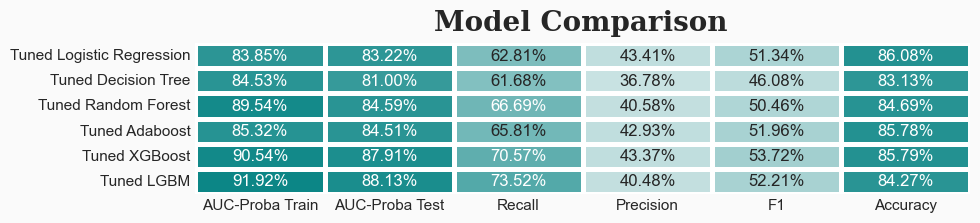

In [176]:
import matplotlib
df_models = round(pd.concat([logreg_df, dtree_df, rforest_df, adaboost_df, xgboost_df, lgbm_df], axis=1),4)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor=Colors.LightGray) # create figure
gs = fig.add_gridspec(3, 3, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])
ax0.patch.set_facecolor('white')
sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(Colors.LightGray) 
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(1.85,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif')

fig.show()

Berdasarkan hasil hyperparameter tuning, terdapat beberapa kesimpulan yang dapat diambil :
- Terdapat dua model yang menjadi pertimbangan utama yaitu model menggunakan algoritma XGBoost dan LGBM. Hal ini dikarenakan nilai AUC-Proba Train pada kedua model tersebut sudah melebihi 90%.
- Meskipun terdapat sedikit overfitting pada kedua model, namun nilai Recall-nya sudah cukup tinggi. Hal ini menjadi pertimbangan penting dalam konteks bisnis credit risk, di mana kita tidak ingin salah prediksi nasabah yang diperkirakan berpotensi default padahal sebenarnya tidak default.
- Namun atas pertimbangan nilai akurasi, model yang menggunakan algoritma tuned XGBoost lebih unggul. Oleh karena itu, model dengan algoritma tuned XGBoost dapat dipilih sebagai model terbaik untuk digunakan dalam memprediksi risiko kredit pada bisnis tersebut.

## Metrics Evaluation

XGBoost Score Before Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.80      0.91      0.86     44305
           1       0.90      0.78      0.83     44305

    accuracy                           0.85     88610
   macro avg       0.85      0.85      0.84     88610
weighted avg       0.85      0.85      0.84     88610

XGBoost Score After Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.77      0.90      0.83     44305
           1       0.88      0.74      0.80     44305

    accuracy                           0.82     88610
   macro avg       0.83      0.82      0.82     88610
weighted avg       0.83      0.82      0.82     88610



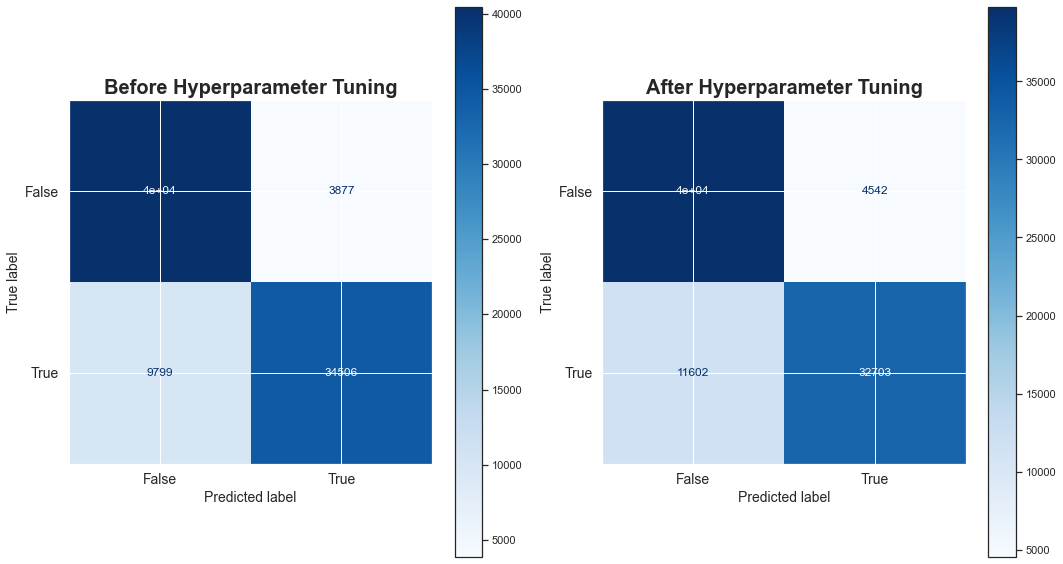

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.set_style("white")

# adjust font size of axis labels
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)

# adjust font size of x and y axis labels
ax[0].set_xlabel("Predicted Labels", fontsize=14)
ax[0].set_ylabel("True Labels", fontsize=14)
ax[1].set_xlabel("Predicted Labels", fontsize=14)
ax[1].set_ylabel("True Labels", fontsize=14)

ax[0].set_title("Before Hyperparameter Tuning", fontsize=20, weight='bold')
ax[1].set_title("After Hyperparameter Tuning", fontsize=20, weight='bold')

y_pred_before_tuning = model_xgboost.predict(X_undersampling)
y_pred_after_tuning = tuned_xgboost.predict(X_undersampling)

print("XGBoost Score Before Hyperparameter Tuning")
print(metrics.classification_report(y_undersampling, y_pred_before_tuning))
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_undersampling, y_pred_before_tuning),
    display_labels=[False, True]).plot(ax=ax[0], cmap='Blues')

print("XGBoost Score After Hyperparameter Tuning")
print(metrics.classification_report(y_undersampling, y_pred_after_tuning))
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_undersampling, y_pred_after_tuning),
    display_labels=[False, True]).plot(ax=ax[1], cmap='Blues')
plt.tight_layout()
plt.show()

## KS (Kolmogorov-Smirnov)
- Salah satu metrik evaluasi untuk model credit risk yang umum digunakan. Metrik ini mengukur seberapa baik model mampu membedakan antara kredit yang akan gagal (default) dengan yang akan sukses. KS didasarkan pada kurva distribusi kumulatif yang dihasilkan oleh model untuk kelas kredit yang berbeda (misalnya, default vs. non-default).
- KS biasanya digunakan bersamaan dengan metrik evaluasi lainnya, seperti AUC-ROC (Area Under the Curve - Receiver Operating Characteristic) dan Gini index, untuk memberikan gambaran yang lebih lengkap tentang kinerja model dalam memprediksi risiko kredit.

In [178]:
from sklearn.metrics import roc_curve
from scipy.stats import ks_2samp

# Before Hyperparameter Tuning
y_pred_before_tuning_proba = model_xgboost.predict_proba(X_undersampling)[:,1]
fpr_, tpr_, thresholds_ = roc_curve(y_undersampling, y_pred_before_tuning_proba)

roc_auc_value_ = roc_auc_score(y_undersampling, y_pred_before_tuning_proba).round(4)
gini_value_ = ((2*roc_auc_value_)-1).round(4)
stat_KS_, p_value_ = ks_2samp(y_undersampling, y_pred_before_tuning_proba)
df_fpr_tpr_before = pd.DataFrame({'FPR':fpr_, 'TPR':tpr_, 'Threshold':thresholds_})

# After Hyperparameter Tuning
y_pred_after_tuning_proba = tuned_xgboost.predict_proba(X_undersampling)[:,1]
fpr, tpr, thresholds = roc_curve(y_undersampling, y_pred_after_tuning_proba)
                                                                 
roc_auc_value = roc_auc_score(y_undersampling, y_pred_after_tuning_proba).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)
stat_KS, p_value = ks_2samp(y_undersampling, y_pred_after_tuning_proba)   
df_fpr_tpr_after = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
                              
#Table
tabel_perform_model = pd.DataFrame({'Kategori (Data Test)':['Before Hyperparamater Tunning', 'After Hyperparamater Tunning'],
                             'AUC_ROC' : [roc_auc_value_, roc_auc_value],
                             'Gini' : [gini_value_, gini_value],
                            'KS' : [round(stat_KS_,4), round(stat_KS,4)]})

In [179]:
tabel_perform_model

,Kategori (Data Test),AUC_ROC,Gini,KS
0,Before Hyperparamater Tunning,0.9323,0.8646,0.5
1,After Hyperparamater Tunning,0.9054,0.8108,0.5


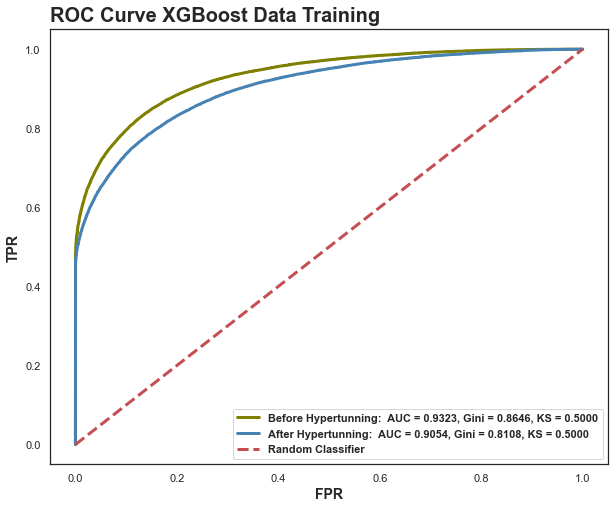

In [180]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot()
plt.plot(fpr_, tpr_, 'Olive', label='%s AUC = %0.4f, Gini = %0.4f, KS = %0.4f' % ('Before Hypertunning: ', tabel_perform_model['AUC_ROC'][0], tabel_perform_model['Gini'][0], tabel_perform_model['KS'][0]),linewidth=3)
plt.plot(fpr, tpr, 'Steelblue', label='%s AUC = %0.4f, Gini = %0.4f, KS = %0.4f' % ('After Hypertunning: ', tabel_perform_model['AUC_ROC'][1], tabel_perform_model['Gini'][1], tabel_perform_model['KS'][1]),linewidth=3)
plt.plot([0,1], [0,1], 'r--', label='Random Classifier', linewidth=3)
plt.text(x=-0.05,y=1.07,s="ROC Curve XGBoost Data Training",fontsize=20,weight='bold')
plt.xlabel('FPR',weight='bold',fontsize=14)
plt.ylabel('TPR',weight='bold',fontsize=14)
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)
plt.show()

- Secara umum, performa model sebelum dan sesudah hyperparameter tuning masih cukup baik karena nilai AUC_ROC dan Gini yang cukup tinggi. Namun, terdapat penurunan performa sedikit pada model setelah dilakukan hyperparameter tuning. 
- Hal ini mungkin disebabkan oleh penggunaan range parameter dan jumlah cv yang lebih kecil dikarenakan keterbatasan memori PC, sehingga belum berhasil menemukan kombinasi parameter terbaik untuk model. Apabila memungkinkan, jalankan model kembali menggunakan oversamplingdan cv yang lebih besar.
- Sementara itu, nilai KS tetap sama pada kedua model, yang menunjukkan bahwa model masih memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif pada data test.

## Test Dataset Evaluation

XGBoost Score After Hyperparameter Tuning on Test Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     82151
           1       0.43      0.71      0.54     10872

    accuracy                           0.86     93023
   macro avg       0.70      0.79      0.73     93023
weighted avg       0.90      0.86      0.87     93023



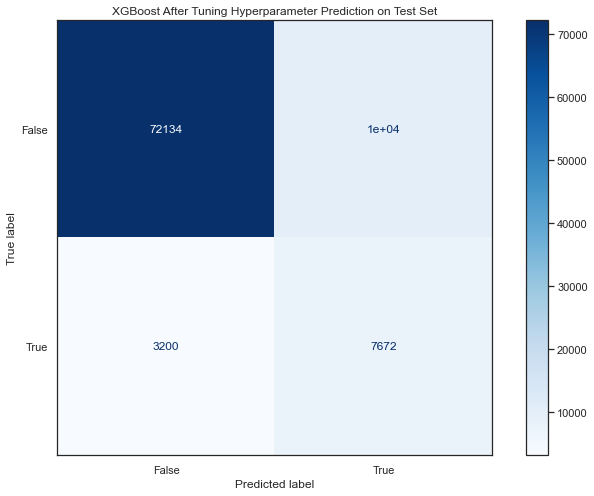

In [181]:
y_pred_test_tuned = tuned_xgboost.predict(X_test_processed)
y_pred_test_tuned_proba = tuned_xgboost.predict_proba(X_test_processed)[:,1]

print("XGBoost Score After Hyperparameter Tuning on Test Set")
print(metrics.classification_report(y_test,y_pred_test_tuned))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_tuned)
metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix, 
    display_labels = [False, True]).plot(cmap='Blues')
plt.title("XGBoost After Tuning Hyperparameter Prediction on Test Set");

- Setelah dilakukan tuning, model berhasil mencapai performa yang cukup baik dalam memprediksi risiko kredit pada dataset test. Hal ini dapat dilihat dari confusion matrix yang dihasilkan, di mana terdapat 7672 data kelas positif yang benar diprediksi (True Positive), 72134 data kelas negatif yang benar diprediksi (True Negative), lebih dari 10000 data kelas negatif yang salah diprediksi sebagai kelas positif (False Positive), dan 3200 data kelas positif yang salah diprediksi sebagai kelas negatif (False Negative).

- Dalam konteks dataset credit risk, kelas positif menunjukkan nasabah yang berpotensi default, sedangkan kelas negatif menunjukkan nasabah yang diprediksi tidak berpotensi default. Dengan demikian, model berhasil memprediksi sebanyak 7672 nasabah yang berpotensi default dan 72134 nasabah yang tidak berpotensi default dengan benar.

- Meskipun demikian, terdapat juga sebanyak lebih dari 10000 nasabah yang diprediksi tidak berpotensi default padahal sebenarnya berpotensi default (False Positive) dan 3200 nasabah yang diprediksi berpotensi default padahal sebenarnya tidak berpotensi default (False Negative). Hal ini dapat menjadi bahan evaluasi lebih lanjut untuk meningkatkan performa model dalam memprediksi risiko kredit pada dataset tersebut.

# Final Model

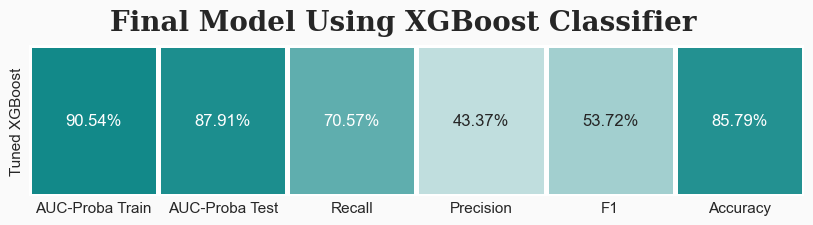

In [182]:
import matplotlib
df_models = round(pd.concat([xgboost_df], axis=1),4)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor=Colors.LightGray) # create figure
gs = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])
ax0.patch.set_facecolor('white')
sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(Colors.LightGray) 
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(0.625,-0.1,'Final Model Using XGBoost Classifier',fontsize=20,fontweight='bold',fontfamily='serif')

fig.show()

# Feature Importance

In [183]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.get_booster().get_score(importance_type='weight'), index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.title('Feature Importance Score')

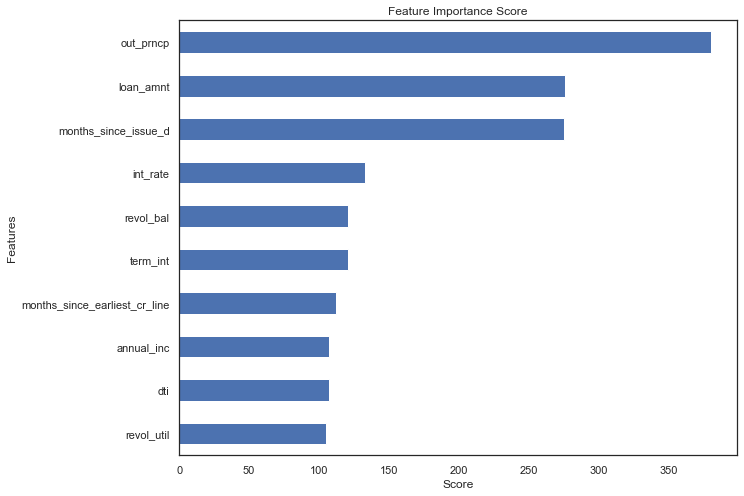

In [184]:
show_feature_importance(tuned_xgboost)

Setelah dilakukan tuning pada model XGBoost pada dataset credit risk, ditemukan bahwa 10 fitur teratas yang paling berpengaruh terhadap prediksi default nasabah adalah sebagai berikut:

1. out_prncp: Jumlah sisa pokok pinjaman yang harus dibayarkan pada saat prediksi.
2. loan_amnt: Jumlah pinjaman yang diminta oleh nasabah.
3. months_since_issue_d: Jumlah bulan sejak pemberian pinjaman.
4. months_since_earliest_cr_line: Jumlah bulan sejak tanggal pembukaan laporan kredit pertama nasabah.
5. dti: Rasio hutang terhadap pendapatan nasabah.
6. annual_inc: Pendapatan tahunan nasabah.
7. int_rate: Tingkat bunga pinjaman.
8. revol_bal: Total saldo hutang pada kartu kredit nasabah.
9. tot_cur_bal: Total saldo hutang nasabah.
10. revol_util: Rasio penggunaan kredit nasabah pada limit kredit yang tersedia pada kartu kredit.

- Dari 10 fitur tersebut, 4 di antaranya berkaitan dengan jumlah pinjaman dan jumlah hutang nasabah (out_prncp, loan_amnt, revol_bal, dan tot_cur_bal), 2 berkaitan dengan rasio hutang dan pendapatan (dti dan annual_inc), 2 berkaitan dengan tingkat bunga (int_rate) dan rasio penggunaan kredit (revol_util), dan 2 lagi berkaitan dengan lama nasabah menggunakan kredit (months_since_issue_d dan months_since_earliest_cr_line).

Hal ini menunjukkan bahwa faktor-faktor yang berhubungan dengan jumlah dan rasio hutang, pendapatan, tingkat bunga, dan penggunaan kredit merupakan faktor penting yang perlu diperhatikan dalam menganalisis risiko kredit nasabah.

# Shap Values

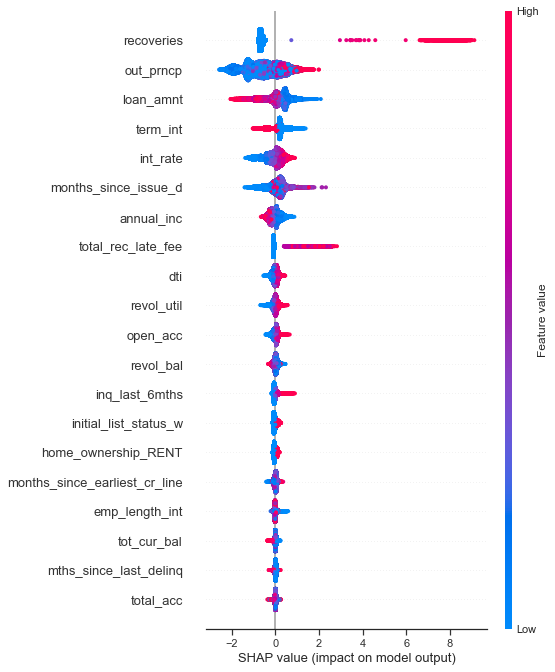

In [185]:
import shap

best_xgboost = tuned_xgboost.best_estimator_  # extract the best estimator
explainer = shap.TreeExplainer(best_xgboost)  # pass the best estimator to the TreeExplainer
shap_values = explainer.shap_values(X_test_processed)
shap.summary_plot(shap_values, X_test_processed)

## Analisis Shap Values

`out_prncp`
- out_prncp adalah total outstanding principal amount atau jumlah pokok pinjaman yang belum dilunasi oleh nasabah pada saat tertentu.
- Semakin tinggi jumlah pokok pinjaman yang belum dilunasi oleh peminjam pada saat tertentu, semakin besar kemungkinan nasabah akan mengalami masalah dalam pembayaran pinjaman atau mengalami default pada pinjaman tersebut.

- <b>saran</b> : Perusahaan perbankan atau pemberi pinjaman dapat memperkuat manajemen risiko dengan melakukan pemantauan terhadap jumlah pokok pinjaman yang belum dilunasi oleh nasabah secara berkala dan mempertimbangkan tindakan preventif untuk meminimalkan risiko kredit.

`recoveries`
- recoveries adalah jumlah uang yang berhasil dikumpulkan oleh kreditur dari nasabah yang mengalami keterlambatan pembayaran atau gagal membayar pinjaman.
- Semakin tinggi jumlah recoveries, semakin besar kemungkinan nasabah akan mengalami default. 

- <b>saran</b> : Ketika nasabah gagal membayar, perusahaan mungkin dapat memulihkan sebagian dari jumlah yang mereka pinjam melalui berbagai tindakan seperti penjualan koleateral atau penyelesaian dengan nasabah. Namun, perusahaan harus mempertimbangkan untuk tidak terlalu mengandalkan pemulihan tersebut. Dalam hal ini, perusahaan dapat mengambil langkah-langkah seperti meningkatkan persyaratan kredit atau meninjau ulang strategi pemulihan mereka untuk membatasi jumlah pemulihan yang diharapkan dan mengurangi risiko default.

`loan_amnt`
- loan_amnt adalah jumlah uang yang dipinjamkan kepada nasabah dalam sebuah pinjaman.
- Semakin kecil jumlah pinjaman, maka semakin besar kemungkinan nasabah akan default. Secara logika, hal ini cukup menarik karena pada umumnya semakin kecil sebuah pinjaman maka peminjam akan semakin mudah membayar cicilannya.
- Ada kemungkinan bahwa pada dataset tersebut, terdapat banyak pinjaman kecil yang diberikan kepada nasabah dengan profil risiko tinggi atau yang memiliki riwayat kredit buruk. Sehingga, meskipun pinjaman kecil, tetapi kemungkinan nasabah untuk default tetap tinggi.
- Faktor lain seperti penggunaan undersampling pada saat pre-processing dapat mempengaruhi hal tersebut.

- <b>saran</b> : Perusahaan harus lebih memperhatikan profil risiko nasabah daripada hanya melihat loan_amount saja. Perusahaan dapat melakukan analisis risiko kredit yang lebih mendalam dengan mempertimbangkan faktor-faktor lain seperti riwayat kredit, tingkat penghasilan, dan tujuan penggunaan pinjaman.
 
`term_int`
- term_int adalah jangka waktu (tenor) nasabah dalam satuan bulan. Fitur ini mengindikasikan berapa lama waktu yang diberikan kepada peminjam untuk membayar kembali pinjamannya.
- Pinjaman dengan jangka waktu 36 bulan akan lebih cenderung default dibandingkan dengan jangka waktu 60 bulan. Hal ini memang berlainan dengan logika, tetapi ada faktor lain yang bisa saja mempengaruhi hal tersebut seperti nasabah dengan tenor 36 finansialnya lebih tidak stabil dibandingkan dengan nasabah yang dengan tenor 60 bulan. 

- <b>saran</b> : Diversifikasi portofolio kredit merupakan salah satu strategi untuk mengurangi risiko kredit yang dihadapi oleh perusahaan. Dengan memiliki portofolio yang terdiversifikasi, perusahaan dapat menyebar risiko di antara banyak nasabah dengan profil risiko yang berbeda-beda, sehingga jika ada nasabah yang mengalami masalah dalam membayar pinjamannya, risiko kerugian dapat diminimalisir. Perusahaan juga dapat memberikan edukasi tentang manajemen keuangan (terkait tenor) kepada nasabah untuk membantu mereka memahami risiko kredit dan bagaimana mengelola keuangan mereka dengan baik. Hal ini dapat membantu mengurangi risiko default di masa depan.

`int_rate`
- int_rate adalah tingkat suku bunga atau interest rate yang dikenakan pada pinjaman yang diberikan kepada nasabah.
- Semakin tinggi suku bunga pinjaman, semakin tinggi risiko defaultnya.

- <b>saran</b> : Mempertimbangkan tingkat suku bunga (int_rate) yang lebih rendah pada pinjaman yang diberikan, terutama pada nasabah dengan profil risiko yang lebih tinggi. Perusahaan dapat melakukan analisis risiko yang lebih cermat dan akurat untuk menetapkan tingkat suku bunga yang sesuai dengan profil risiko nasabah. Selain itu, perusahaan juga dapat mempertimbangkan untuk memberikan insentif atau diskon suku bunga kepada nasabah yang memiliki riwayat pembayaran yang baik dan konsisten. Dengan demikian, perusahaan dapat mengurangi risiko default dan meningkatkan kepercayaan nasabah terhadap perusahaan.

`annual_inc`
- annual_inc adalah pendapatan tahunan (annual income) dari nasabah.
- Semakin kecil income tahunan nasabah, maka semakin besar kemungkinan pinjamannya akan default.

- <b>saran</b> : Mempertimbangkan untuk menawarkan opsi pembayaran yang lebih fleksibel kepada nasabah dengan pendapatan yang rendah, seperti jangka waktu pembayaran yang lebih lama atau bunga yang lebih rendah. Hal ini dapat membantu mengurangi beban pembayaran bulanan bagi nasabah dan memperkecil kemungkinan mereka mengalami kesulitan dalam membayar cicilan pinjaman.

`total_rec_late_fee`
- total_rec_late_fee adalah total biaya denda yang harus dibayar oleh nasabah karena pembayaran pinjaman terlambat.
- Semakin besar denda pinjaman yang terlambat, maka kemungkinan nasabah akan default juga semakin besar.

- <b>saran</b> : Melakukan monitoring secara berkala terhadap nasabah yang terlambat membayar pinjamannya dan memberikan pengingat dan peringatan agar mereka segera membayar. Perusahaan dapat mempertimbangkan untuk menetapkan biaya denda yang lebih tinggi untuk nasabah yang sering terlambat membayar atau yang memiliki riwayat pembayaran yang buruk, sehingga dapat memberikan insentif bagi nasabah untuk membayar tepat waktu.